<a href="https://www.kaggle.com/code/samarchhetri/loan-sanction-amount-prediction?scriptVersionId=124160509" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-sanction-amount-prediction-data/train.csv
/kaggle/input/loan-sanction-amount-prediction-data/test.csv


## Problem Overview
A bank goes to a long and traditional processes while providing loan to customers. They normally verify and review the applications manually. After that only, they make decision whether to provide loan or not. First of all, they either approve or disapprove the loan application. If they approve, then they make the decision on how much loan to provide. Normally, 100% loan is not approved. On the basis of details they receive, they pass the loan amount.

In this project, we first of all work on the decision of loan approval. If Yes, then, how much to approve. We have automated the whole processes. Now, bank can easily go through loan sanction process.

Here, we have used both Classification and Regression methods. Classification for loan sanction decision and regression for loan amount sanction decision

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')  # Supress warnings

## Basic Overview

In [3]:
# Load dataset
train_dataset = pd.read_csv('/kaggle/input/loan-sanction-amount-prediction-data/train.csv')
test_dataset = pd.read_csv('/kaggle/input/loan-sanction-amount-prediction-data/test.csv')

In [4]:
# Dataset shape
# For train data
train_rows = train_dataset.shape[0]
train_cols = train_dataset.shape[1]
# For test data
test_rows = test_dataset.shape[0]
test_cols = test_dataset.shape[1]

print(f'There are {train_rows} rows and {train_cols} columns in train dataset')
print(f'There are {test_rows} rows and {test_cols} columns in test dataset')

There are 30000 rows and 24 columns in train dataset
There are 20000 rows and 23 columns in test dataset


In [5]:
# Data types
print('TRAIN DATASET :\n')
display(train_dataset.dtypes)
print()
print('TEST DATASET :\n')
display(test_dataset.dtypes)

TRAIN DATASET :



Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object


TEST DATASET :



Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                    object
Property Price                  object
dtype: object

In [6]:
# Checking for data type
for dt in train_dataset.columns:
    if dt == 'Loan Sanction Amount (USD)':
        continue
    train_dtypes = train_dataset[dt].dtype
    test_dtypes = test_dataset[dt].dtype
    
    # Match data types
    if train_dtypes != test_dtypes:
        print(dt)

Co-Applicant
Property Price


Two features are not matched in data type. They are:
Co-Applicant
Property Price

##### In test data, Property Price and Co-Applicant features are in object type. They should be in integer type.
##### Feature 'Property Type' is in integer form. It is actually categorical feature.

## Data Cleaning

In [7]:
# Checking for missing values
print('Missing values in Train Set : \n')
display(train_dataset.isna().sum().sort_values(ascending=False))

print('Missing values in Test set : \n')
display(test_dataset.isna().sum().sort_values(ascending=False))

Missing values in Train Set : 



Type of Employment             7270
Property Age                   4850
Income (USD)                   4576
Dependents                     2493
Credit Score                   1703
Income Stability               1683
Has Active Credit Card         1566
Property Location               356
Loan Sanction Amount (USD)      340
Current Loan Expenses (USD)     172
Gender                           53
Property Price                    0
Co-Applicant                      0
Property Type                     0
Property ID                       0
Customer ID                       0
No. of Defaults                   0
Name                              0
Expense Type 1                    0
Loan Amount Request (USD)         0
Location                          0
Profession                        0
Age                               0
Expense Type 2                    0
dtype: int64

Missing values in Test set : 



Type of Employment             4689
Dependents                     1142
Has Active Credit Card         1076
Property Age                    892
Income Stability                813
Income (USD)                    750
Credit Score                    743
Property Location               160
Current Loan Expenses (USD)      83
Gender                           31
Customer ID                       0
No. of Defaults                   0
Co-Applicant                      0
Property Type                     0
Property ID                       0
Expense Type 1                    0
Expense Type 2                    0
Name                              0
Loan Amount Request (USD)         0
Location                          0
Profession                        0
Age                               0
Property Price                    0
dtype: int64

In [8]:
# Missing values percent
train_total_cells, test_total_cells = (train_rows * train_cols) , (test_rows * test_cols)
train_missing_cells = train_dataset.isna().sum().sum()
test_missing_cells = test_dataset.isna().sum().sum()

train_missing_perc = np.round((train_missing_cells/ train_total_cells)*100, 2)
test_missing_perc = np.round((test_missing_cells/ test_total_cells)*100, 2)

print(f'Total missing percent in Train data is {train_missing_perc} %')
print(f'Total missing percent in Test data is {test_missing_perc} %')

Total missing percent in Train data is 3.48 %
Total missing percent in Test data is 2.26 %


##### As can be seen, the missing value percent is not high. It is normal. We will impute them using appropriate techniques which we will do in Handling Missing Values Section

In [9]:
# Checking for duplicates
train_dataset.duplicated().sum()
test_dataset.duplicated().sum()

0

In [10]:
# Checking for cardinality
print('Number of unique values in Train data : \n')
display(train_dataset.nunique().sort_values(ascending=False))
print('Number of unique values in Test data : \n')
display(test_dataset.nunique().sort_values(ascending=False))

Number of unique values in Train data : 



Customer ID                    30000
Name                           30000
Loan Amount Request (USD)      29982
Property Price                 29632
Income (USD)                   24429
Property Age                   24179
Current Loan Expenses (USD)    24041
Loan Sanction Amount (USD)     21450
Credit Score                   17586
Property ID                      999
Age                               48
Type of Employment                18
Dependents                        10
Profession                         8
Property Type                      4
Location                           3
Has Active Credit Card             3
Property Location                  3
Co-Applicant                       3
Expense Type 1                     2
Income Stability                   2
No. of Defaults                    2
Gender                             2
Expense Type 2                     2
dtype: int64

Number of unique values in Test data : 



Customer ID                    20000
Name                           20000
Loan Amount Request (USD)      19988
Property Price                 19824
Income (USD)                   18693
Property Age                   18560
Current Loan Expenses (USD)    17247
Credit Score                   13756
Property ID                      999
Age                               48
Type of Employment                18
Dependents                        10
Profession                         7
Property Type                      4
Has Active Credit Card             3
Location                           3
Property Location                  3
Co-Applicant                       3
Expense Type 2                     2
Income Stability                   2
Gender                             2
No. of Defaults                    2
Expense Type 1                     2
dtype: int64

##### Customer ID and Name has high cardinality. They may not provide any benefit to our model. So, we will not use them.

In [11]:
# Fixing mis-matched features
columns = ['Co-Applicant', 'Property Price', 'Property Location']
test_dataset[columns].head()

Co-Applicant Property Price Property Location
0            1       236644.5             Urban
1            1       142357.3             Rural
2            1      300991.24             Urban
3            0       125612.1        Semi-Urban
4            1       180908.0        Semi-Urban

In [12]:
# Checking feature values
test_dataset['Co-Applicant'].unique()

array(['1', '0', '?'], dtype=object)

In [13]:
test_dataset['Property Price'][test_dataset['Property Price'] == '?']

22       ?
149      ?
356      ?
402      ?
403      ?
        ..
19422    ?
19492    ?
19674    ?
19865    ?
19922    ?
Name: Property Price, Length: 168, dtype: object

##### Co-Applicant and Property Price contained '?' character which had made its data type as object. Let's remove it.

In [14]:
# Replacing '?' symbol with NAN values
test_dataset[['Co-Applicant', 'Property Price']] = test_dataset[['Co-Applicant', 'Property Price']].replace('?', np.nan)
# Changing data type to float
test_dataset[['Co-Applicant', 'Property Price']] = test_dataset[['Co-Applicant', 'Property Price']].astype('float')

In [15]:
train_dataset['Property Type'].unique()
# This is purely a categorical feature

array([4, 2, 1, 3])

In [16]:
int_to_category = {1: 'property 1', 2: 'property 2', 3: 'property 3', 4: 'property 4'}
# Changing the values
train_dataset['Property Type'].replace(int_to_category, inplace=True)
test_dataset['Property Type'].replace(int_to_category, inplace=True)

In [17]:
# Dropping missing values of target feature
train_dataset.dropna(subset=['Loan Sanction Amount (USD)'],inplace=True)

In [18]:
# Dropping Name feature
train_dataset.drop(columns=['Name'], inplace=True)
test_dataset.drop(columns=['Name'], inplace=True)

In [19]:
# Checking for mis-spelled words
columns = train_dataset.select_dtypes('object').columns

for col in columns:
    if col == 'Customer ID':
        continue   # Excluding Customer ID feature
    print(f'For Train data : {train_dataset[col].unique()}')
    
for col in columns:
    if col=='Customer ID':
        continue
    print(f'For Test data :{test_dataset[col].unique()}')
    
    

For Train data : ['F' 'M' nan]
For Train data : ['Low' 'High' nan]
For Train data : ['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
For Train data : ['Sales staff' nan 'High skill tech staff' 'Secretaries' 'Laborers'
 'Managers' 'Cooking staff' 'Core staff' 'Drivers' 'Realty agents'
 'Security staff' 'Accountants' 'Private service staff'
 'Waiters/barmen staff' 'Medicine staff' 'Cleaning staff'
 'Low-skill Laborers' 'HR staff' 'IT staff']
For Train data : ['Semi-Urban' 'Rural' 'Urban']
For Train data : ['N' 'Y']
For Train data : ['N' 'Y']
For Train data : [nan 'Unpossessed' 'Active' 'Inactive']
For Train data : ['property 4' 'property 2' 'property 1' 'property 3']
For Train data : ['Rural' 'Urban' 'Semi-Urban' nan]
For Test data :['F' 'M' nan]
For Test data :['Low' 'High' nan]
For Test data :['Commercial associate' 'Working' 'Pensioner' 'State servant' 'Unemployed'
 'Maternity leave' 'Student']
For Test data :['Mana

##### There does not seem any misspelled words

In [20]:
# Mis-typed numbers
columns= train_dataset.select_dtypes(exclude='object').columns

for col in columns:
    train_min = train_dataset[col].min()
    train_max = train_dataset[col].max()
    print(f'For train {col} : [{train_min} to {train_max}]')
    
print()
# For test data
for col in columns:
    if col == 'Loan Sanction Amount (USD)':
        continue
    test_min = test_dataset[col].min()
    test_max = test_dataset[col].max()
    print(f'For train {col} : [{test_min} to {test_max}]')




For train Age : [18 to 65]
For train Income (USD) : [377.7 to 1777460.21]
For train Loan Amount Request (USD) : [6048.24 to 621497.82]
For train Current Loan Expenses (USD) : [-999.0 to 3840.88]
For train Dependents : [1.0 to 14.0]
For train Credit Score : [580.0 to 896.26]
For train No. of Defaults : [0 to 1]
For train Property ID : [1 to 999]
For train Property Age : [377.7 to 1777460.21]
For train Co-Applicant : [-999 to 1]
For train Property Price : [-999.0 to 1077966.73]
For train Loan Sanction Amount (USD) : [-999.0 to 481907.32]

For train Age : [18 to 65]
For train Income (USD) : [368.59 to 30427.68]
For train Loan Amount Request (USD) : [6185.48 to 576335.68]
For train Current Loan Expenses (USD) : [41.37 to 3305.97]
For train Dependents : [1.0 to 13.0]
For train Credit Score : [580.04 to 893.83]
For train No. of Defaults : [0 to 1]
For train Property ID : [1 to 999]
For train Property Age : [368.59 to 30427.68]
For train Co-Applicant : [0.0 to 1.0]
For train Property Price : 

##### Some features have unnatural numbers. They are:
* Current Loan Expenses (USD) : [-999.0 to 3840.88]
* Co-Applicant : [-999 to 1]
* Property Price : [-999.0 to 1077966.73]
* Loan Sanction Amount (USD) : [-999.0 to 481907.32]
##### This might be a way of expressing missing values. Here, also we would assume the same

In [21]:
var = ['Current Loan Expenses (USD)', 'Co-Applicant', 'Property Price', 'Loan Sanction Amount (USD)']
(train_dataset[var]== -999).sum()/ len(train_dataset)*100

Current Loan Expenses (USD)    0.586649
Co-Applicant                   0.556305
Property Price                 1.149697
Loan Sanction Amount (USD)     1.139582
dtype: float64

In [22]:
# The values containing -999 is not so much. So, we will drop it as it might get us to trouble in future.
index_to_keep = (train_dataset[var] != -999).all(axis=1)
train_dataset = train_dataset.loc[index_to_keep]
train_dataset.shape

(28674, 23)

##### Income (USD) and Property Age looks similar ,but, in reality they are not. Let's check for it.

In [23]:
train_dataset[['Income (USD)', 'Property Age']].describe()

Income (USD)  Property Age
count  2.441800e+04  2.416100e+04
mean   2.633196e+03  2.633327e+03
std    1.148896e+04  1.154868e+04
min    3.777000e+02  3.777000e+02
25%    1.650043e+03  1.649420e+03
50%    2.222520e+03  2.223600e+03
75%    3.090082e+03  3.090520e+03
max    1.777460e+06  1.777460e+06

In [24]:
train_dataset['Income (USD)'].equals(train_dataset['Property Age'])

False

In [25]:
# Checking missing values to both features
train_dataset[['Income (USD)', 'Property Age']].isna().sum()

Income (USD)    4256
Property Age    4513
dtype: int64

In [26]:
(train_dataset['Income (USD)'] - train_dataset['Property Age']).sum()

0.0

##### Now, it is clear that both features are not same. To reduce co-linearity, we would drop one feature. Here, the missing values is high in Property Age. So, we would drop it.

In [27]:
# Dropping Property Age feature
train_dataset.drop(columns=['Property Age'], inplace=True)
test_dataset.drop(columns=['Property Age'], inplace=True)

In [28]:
# Checking for extra spaces
columns = train_dataset.select_dtypes('object').columns
train_dataset[columns].head()

Customer ID Gender Income Stability Profession     Type of Employment  \
0     C-36995      F              Low    Working            Sales staff   
1     C-33999      M              Low    Working                    NaN   
2      C-3770      F             High  Pensioner                    NaN   
3     C-26480      F             High  Pensioner                    NaN   
4     C-23459      F              Low    Working  High skill tech staff   

     Location Expense Type 1 Expense Type 2 Has Active Credit Card  \
0  Semi-Urban              N              N                    NaN   
1  Semi-Urban              N              Y            Unpossessed   
2  Semi-Urban              N              Y            Unpossessed   
3       Rural              N              Y            Unpossessed   
4  Semi-Urban              N              Y                 Active   

  Property Type Property Location  
0    property 4             Rural  
1    property 2             Rural  
2    property 2             Urban  
3    property 2        Semi-Urban  
4    property 4        Semi-Urban

In [29]:
# Replacing two or more white spaces with single
train_dataset[columns].replace('\s+', ' ',regex=True, inplace=True)
test_dataset[columns].replace('\s+', ' ', regex=True, inplace=True)

In [30]:
# Function for removing extra spaces
def remove_spaces(df, column):
    df[column] = df[column].str.strip()
    return df[column]


# Applying remove spaces
for col in columns:
    train_dataset[col] = remove_spaces(train_dataset, col)
    test_dataset[col] = remove_spaces(test_dataset, col)

## Exploratory Data Analysis (EDA)
* Explore target feature
* Explore categorical as well as continuous features

#### Exploring Target Feature

In [31]:
# General Overview
train_dataset['Loan Sanction Amount (USD)'].describe()

count     28674.000000
mean      48052.551267
std       48251.108968
min           0.000000
25%           0.000000
50%       35842.390000
75%       74657.455000
max      481907.320000
Name: Loan Sanction Amount (USD), dtype: float64

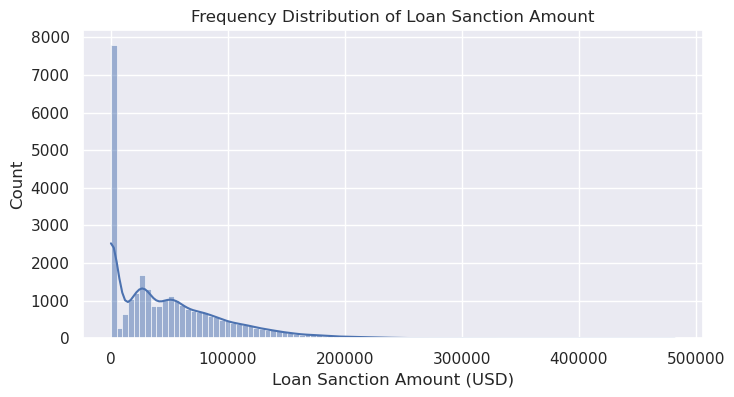

In [32]:
# Histogram Plot
plt.figure(figsize=(8,4))
sns.histplot(train_dataset['Loan Sanction Amount (USD)'], kde=True)
plt.title('Frequency Distribution of Loan Sanction Amount')
plt.show()

##### We can see many 'zero' values which represent that no loan were sanctioned. Now, exporing our feature without zero

In [33]:
# Dataframe without zero value
target_without_zero = train_dataset[train_dataset['Loan Sanction Amount (USD)']>0]

In [34]:
# Withour zero general description
target_without_zero['Loan Sanction Amount (USD)'].describe()

count     20899.000000
mean      65929.415524
std       44896.393332
min        4023.180000
25%       30356.535000
50%       55177.650000
75%       89146.970000
max      481907.320000
Name: Loan Sanction Amount (USD), dtype: float64

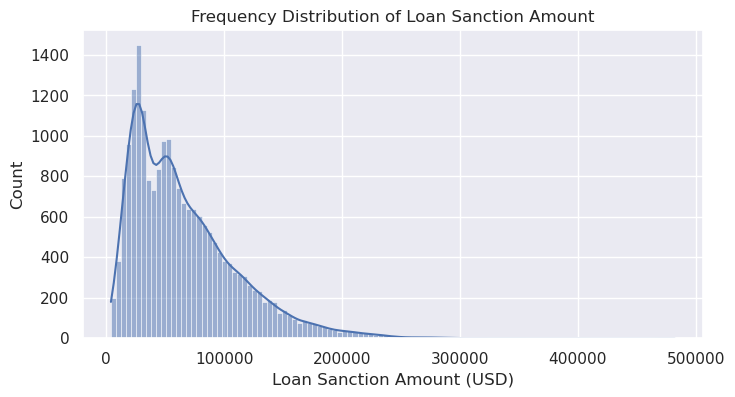

In [35]:
# Histogram Plot without zero
plt.figure(figsize=(8,4))
sns.histplot(target_without_zero['Loan Sanction Amount (USD)'], kde=True)
plt.title('Frequency Distribution of Loan Sanction Amount')
plt.show()

In [36]:
# Checking skewness and kurtosis
print(f"The skewness of target feature is {train_dataset['Loan Sanction Amount (USD)'].skew()}")
print(f"The kurtosis of target feature is {train_dataset['Loan Sanction Amount (USD)'].kurt()}")

The skewness of target feature is 1.2276852265205898
The kurtosis of target feature is 1.7688603413820507


##### Normal acceptance for skewness is ( -2 to 2 )
##### Normal acceptance for kurtosis is ( -7 to 7 )

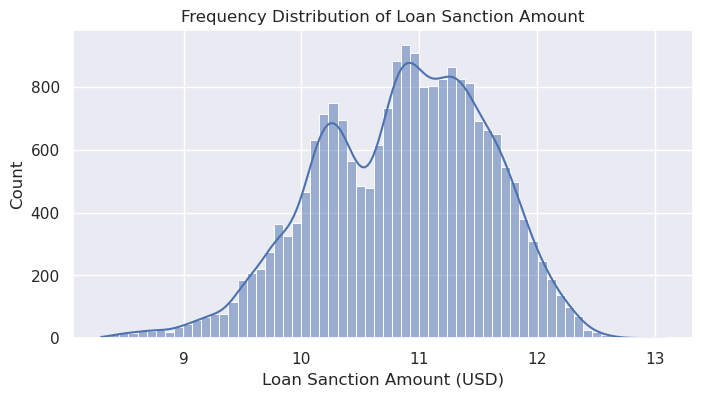

In [37]:
# Histogram Plot without zero 
plt.figure(figsize=(8,4))
sns.histplot(np.log(target_without_zero['Loan Sanction Amount (USD)']), kde=True)
plt.title('Frequency Distribution of Loan Sanction Amount')
plt.show()

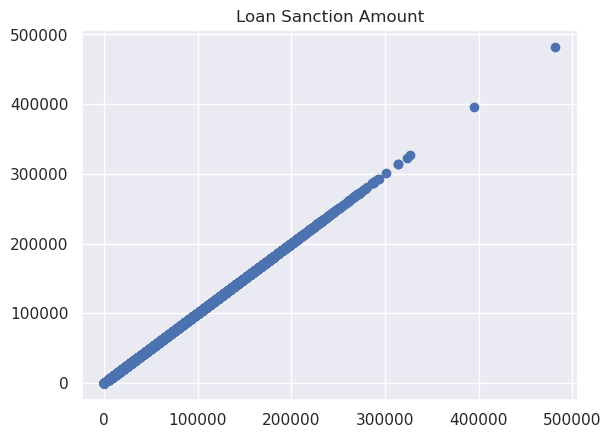

In [38]:
# Looking for outliers
plt.scatter(train_dataset['Loan Sanction Amount (USD)'], train_dataset['Loan Sanction Amount (USD)'])
plt.title('Loan Sanction Amount')
plt.show()

##### Target feature ahs two high values which we will treat as outliers.

##### We will create a new feature to denote whether the loan has sanctioned or not. This will enable us to deal with both regression and classifiaction problems.

In [39]:
# Creating new feature
train_dataset['Loan sanctioned'] = train_dataset['Loan Sanction Amount (USD)']>0

<AxesSubplot:ylabel='Loan sanctioned'>

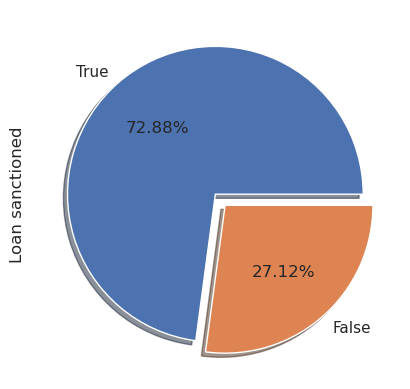

In [40]:
# Distribution of Loan sanctioned
train_dataset['Loan sanctioned'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0, 0.1], shadow=True)

##### As can be seen ,the loan sanctioned feature is not balanced. So, we need to balance it using oversampling or under sampling techniques.

#### Exploring continuous features

In [41]:
con_cols = train_dataset.select_dtypes(include=['int', 'float']).columns
# General overview
train_dataset[con_cols].describe()

Age  Income (USD)  Loan Amount Request (USD)  \
count  28674.000000  2.441800e+04               28674.000000   
mean      40.120423  2.633196e+03               88842.820426   
std       16.062543  1.148896e+04               59499.683996   
min       18.000000  3.777000e+02                6048.240000   
25%       25.000000  1.650043e+03               41246.057500   
50%       40.000000  2.222520e+03               75094.785000   
75%       55.000000  3.090082e+03              119909.202500   
max       65.000000  1.777460e+06              621497.820000   

       Current Loan Expenses (USD)    Dependents  Credit Score  \
count                 28515.000000  26352.000000  27100.000000   
mean                    409.230997      2.254098    740.063580   
std                     217.659666      0.952011     72.150443   
min                      33.760000      1.000000    580.850000   
25%                     250.810000      2.000000    682.057500   
50%                     376.520000      2.000000    740.085000   
75%                     522.450000      3.000000    799.322500   
max                    3840.880000     14.000000    896.260000   

       No. of Defaults   Property ID  Co-Applicant  Property Price  \
count     28674.000000  28674.000000  28674.000000    2.867400e+04   
mean          0.193939    501.852619      0.852445    1.332943e+05   
std           0.395388    288.129959      0.354665    9.283767e+04   
min           0.000000      1.000000      0.000000    7.265950e+03   
25%           0.000000    251.000000      1.000000    6.198011e+04   
50%           0.000000    504.000000      1.000000    1.112732e+05   
75%           0.000000    751.000000      1.000000    1.800614e+05   
max           1.000000    999.000000      1.000000    1.077967e+06   

       Loan Sanction Amount (USD)  
count                28674.000000  
mean                 48052.551267  
std                  48251.108968  
min                      0.000000  
25%                      0.000000  
50%                  35842.390000  
75%                  74657.455000  
max                 481907.320000

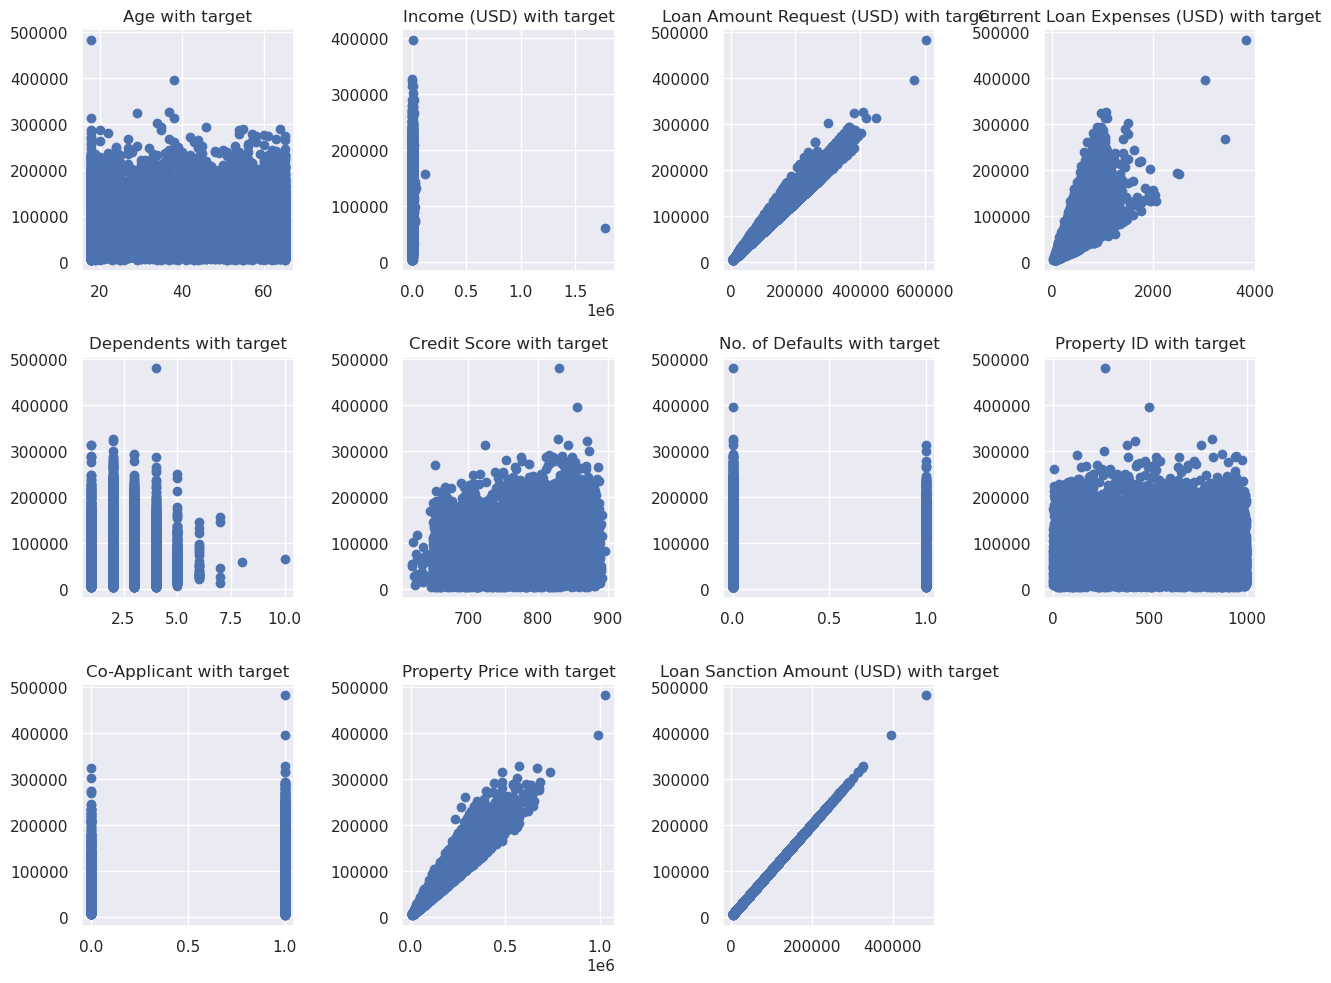

In [42]:
# Analysis for Regression
plt.figure(figsize=(13,10))
for index, col in enumerate(con_cols):
    plt.subplot(3,4, index+1)
    plt.scatter(x=target_without_zero[col], y=target_without_zero['Loan Sanction Amount (USD)'])
    plt.title(f'{col} with target')
plt.tight_layout()

In [43]:
out_vars = ['Income (USD)', 'Current Loan Expenses (USD)', 'Dependents']
train_dataset[out_vars] = train_dataset[out_vars].fillna(-1)

# Filtered dataframe
train_dataset = train_dataset[(train_dataset['Income (USD)']< 18000) & (train_dataset['Current Loan Expenses (USD)']<2500)]

# Replace -1 with nan
train_dataset.replace({-1, np.nan}, inplace=True)

Customer ID                    None
Gender                         None
Age                            None
Income (USD)                   None
Income Stability               None
Profession                     None
Type of Employment             None
Location                       None
Loan Amount Request (USD)      None
Current Loan Expenses (USD)    None
Expense Type 1                 None
Expense Type 2                 None
Dependents                     None
Credit Score                   None
No. of Defaults                None
Has Active Credit Card         None
Property ID                    None
Property Type                  None
Property Location              None
Co-Applicant                   None
Property Price                 None
Loan Sanction Amount (USD)     None
Loan sanctioned                None
dtype: object

In [44]:
# Updating target feature for regression
target_without_zero =train_dataset[train_dataset['Loan Sanction Amount (USD)']>0]

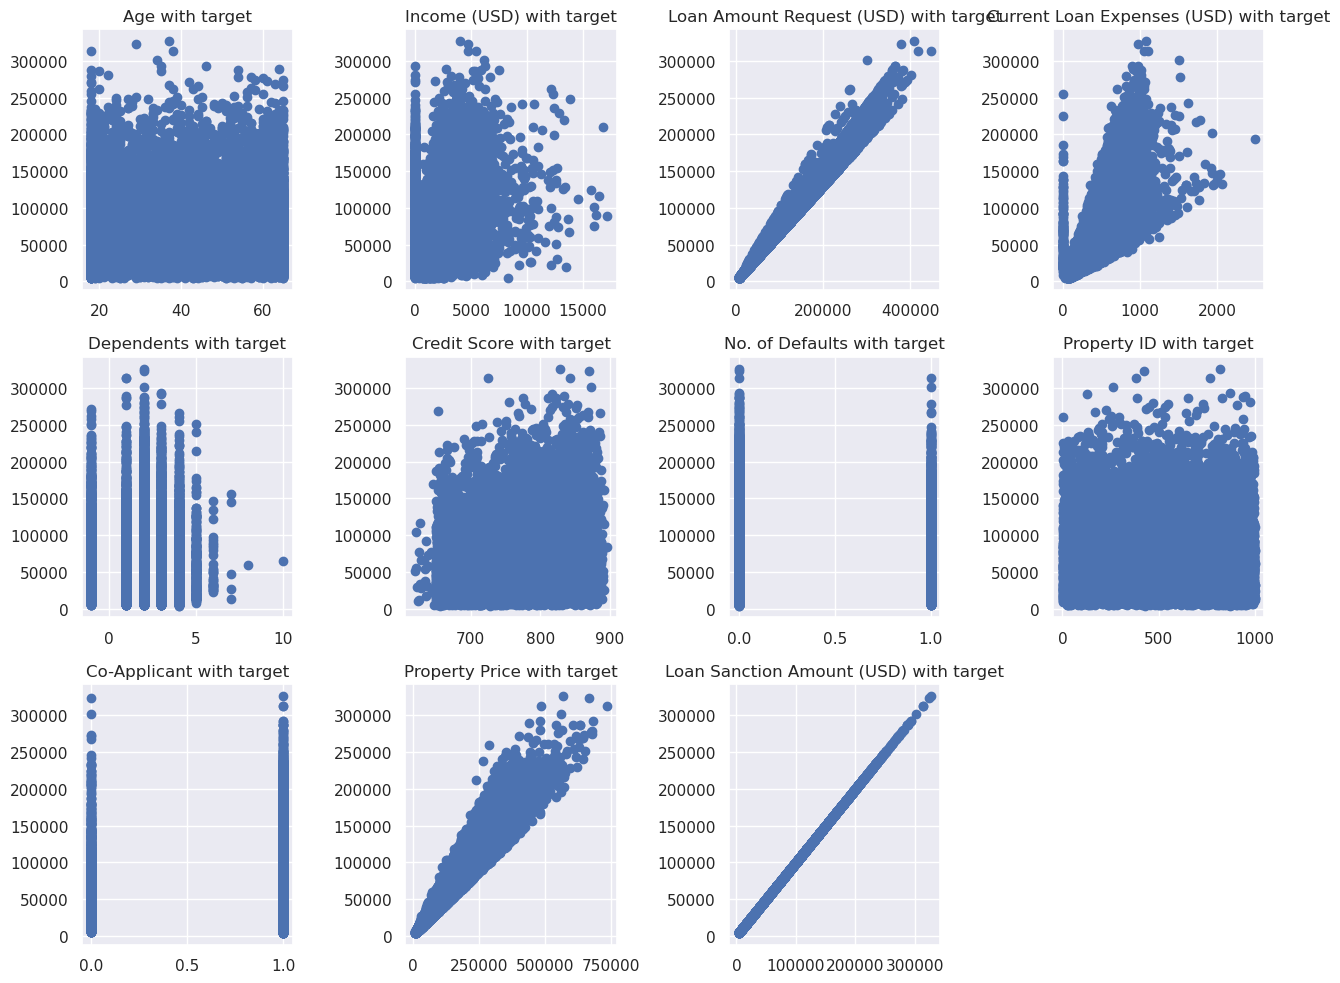

In [45]:
# Analysis for Regression after removing some points
plt.figure(figsize=(13,10))
for index, col in enumerate(con_cols):
    plt.subplot(3,4, index+1)
    plt.scatter(x=target_without_zero[col], y=target_without_zero['Loan Sanction Amount (USD)'])
    plt.title(f'{col} with target')
plt.tight_layout()

Distribution of continuous features


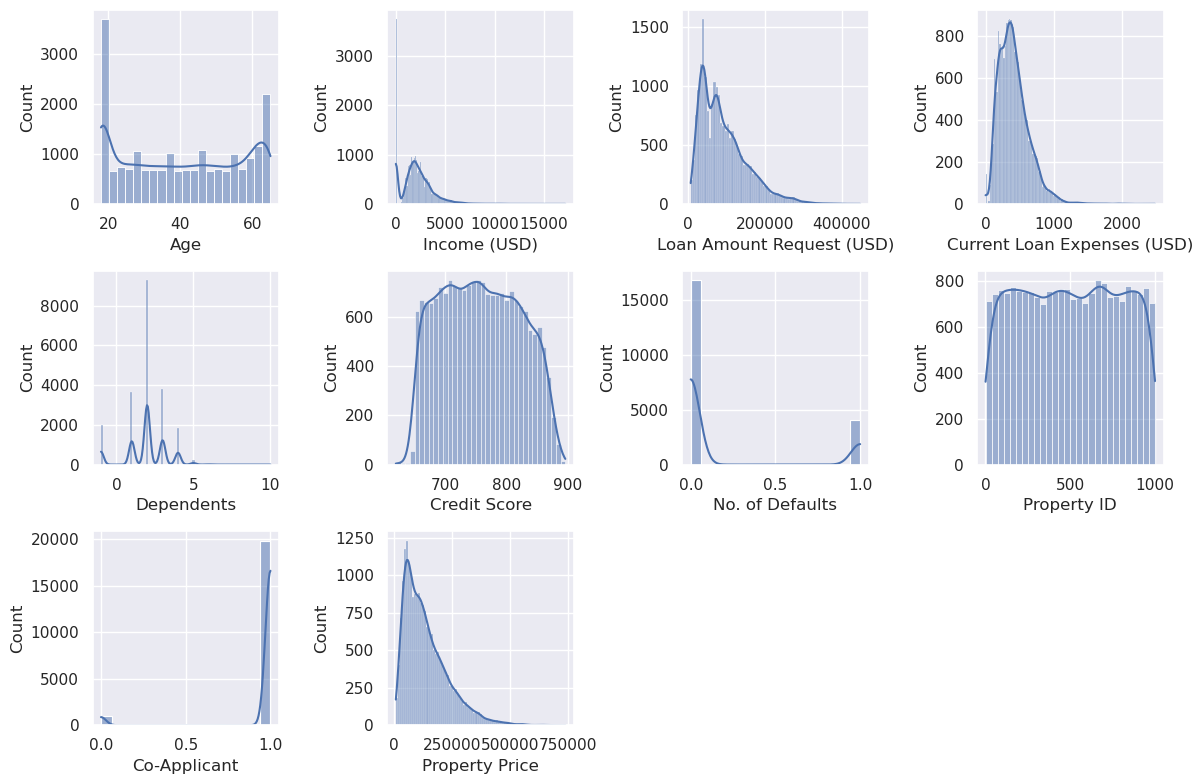

In [46]:
# Distribution plot
plt.figure(figsize=(12,8))
for index, col in enumerate(con_cols):
    if col =='Loan Sanction Amount (USD)':
        continue
        
    plt.subplot(3,4, index+1)
    sns.histplot(x=col, kde=True, data=target_without_zero)
    
print('Distribution of continuous features')
plt.tight_layout()

##### As can be seen. most continuous features do not have normal distribution. We would try to make it normal in feature engineering section.

#### Categorical features

In [47]:
train_dataset.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD)', 'Income Stability',
       'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)', 'Loan sanctioned'],
      dtype='object')

In [48]:
# We do not use Customer ID and Loan sanctioned features for categorical analysis
cat_cols = train_dataset.drop(columns=['Customer ID', 'Loan sanctioned']).select_dtypes('object').columns
target_without_zero[cat_cols].head()

Gender Income Stability Profession     Type of Employment    Location  \
0      F              Low    Working            Sales staff  Semi-Urban   
1      M              Low    Working                    NaN  Semi-Urban   
2      F             High  Pensioner                    NaN  Semi-Urban   
3      F             High  Pensioner                    NaN       Rural   
4      F              Low    Working  High skill tech staff  Semi-Urban   

  Expense Type 1 Expense Type 2 Has Active Credit Card Property Type  \
0              N              N                    NaN    property 4   
1              N              Y            Unpossessed    property 2   
2              N              Y            Unpossessed    property 2   
3              N              Y            Unpossessed    property 2   
4              N              Y                 Active    property 4   

  Property Location  
0             Rural  
1             Rural  
2             Urban  
3        Semi-Urban  
4        Semi-Urban

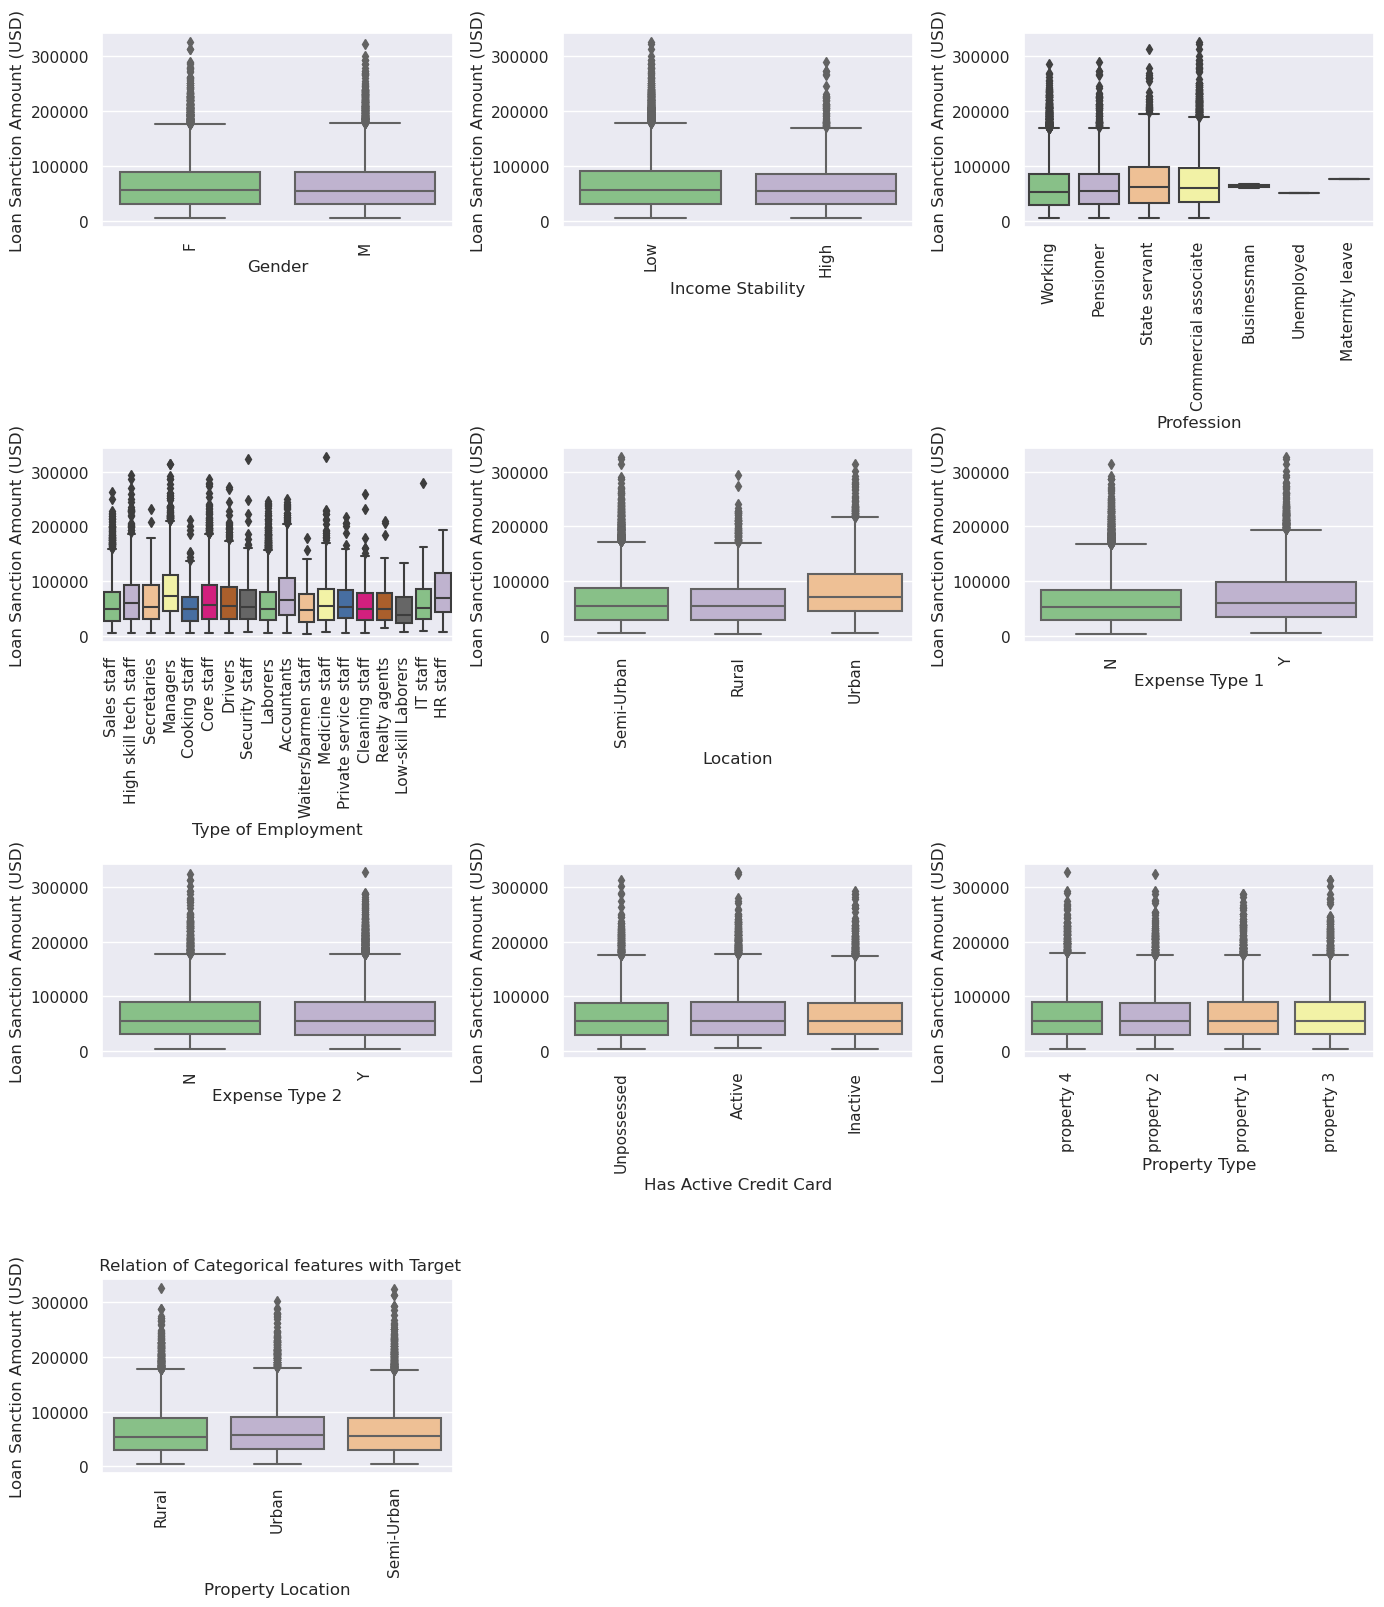

In [49]:
# Relation of categorical columns with target feature
plt.figure(figsize=(14,16))
for index, col in enumerate(cat_cols):
    plt.subplot(4,3, index+1)
    sns.boxplot(x=col, y='Loan Sanction Amount (USD)', data=target_without_zero, palette='Accent')
    plt.xticks(rotation=90)
    
plt.title(' Relation of Categorical features with Target')
plt.tight_layout()

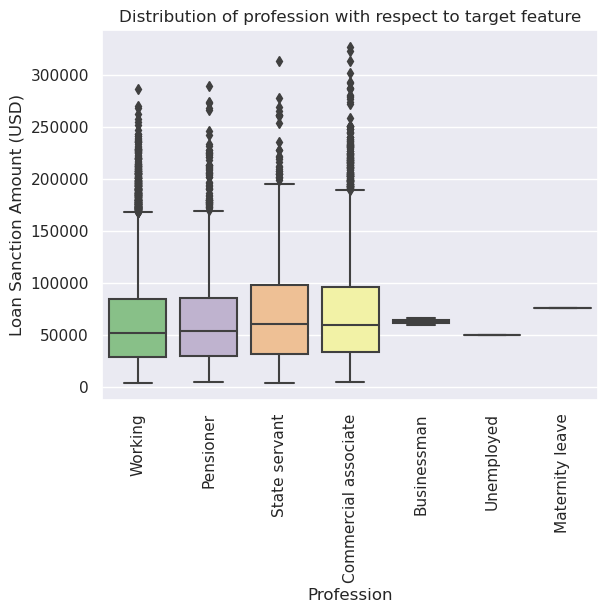

In [50]:
# Profession feature looks different.
# Box-plot for Profession feature
sns.boxplot(x='Profession', y='Loan Sanction Amount (USD)', data=target_without_zero, palette='Accent')
plt.title('Distribution of profession with respect to target feature')
plt.xticks(rotation=90)
plt.show()

In [51]:
# Some categories inside Profession feature looks weird. Let's do count them
target_without_zero['Profession'].value_counts()

Working                 11303
Commercial associate     5596
Pensioner                2279
State servant            1700
Businessman                 2
Unemployed                  1
Maternity leave             1
Name: Profession, dtype: int64

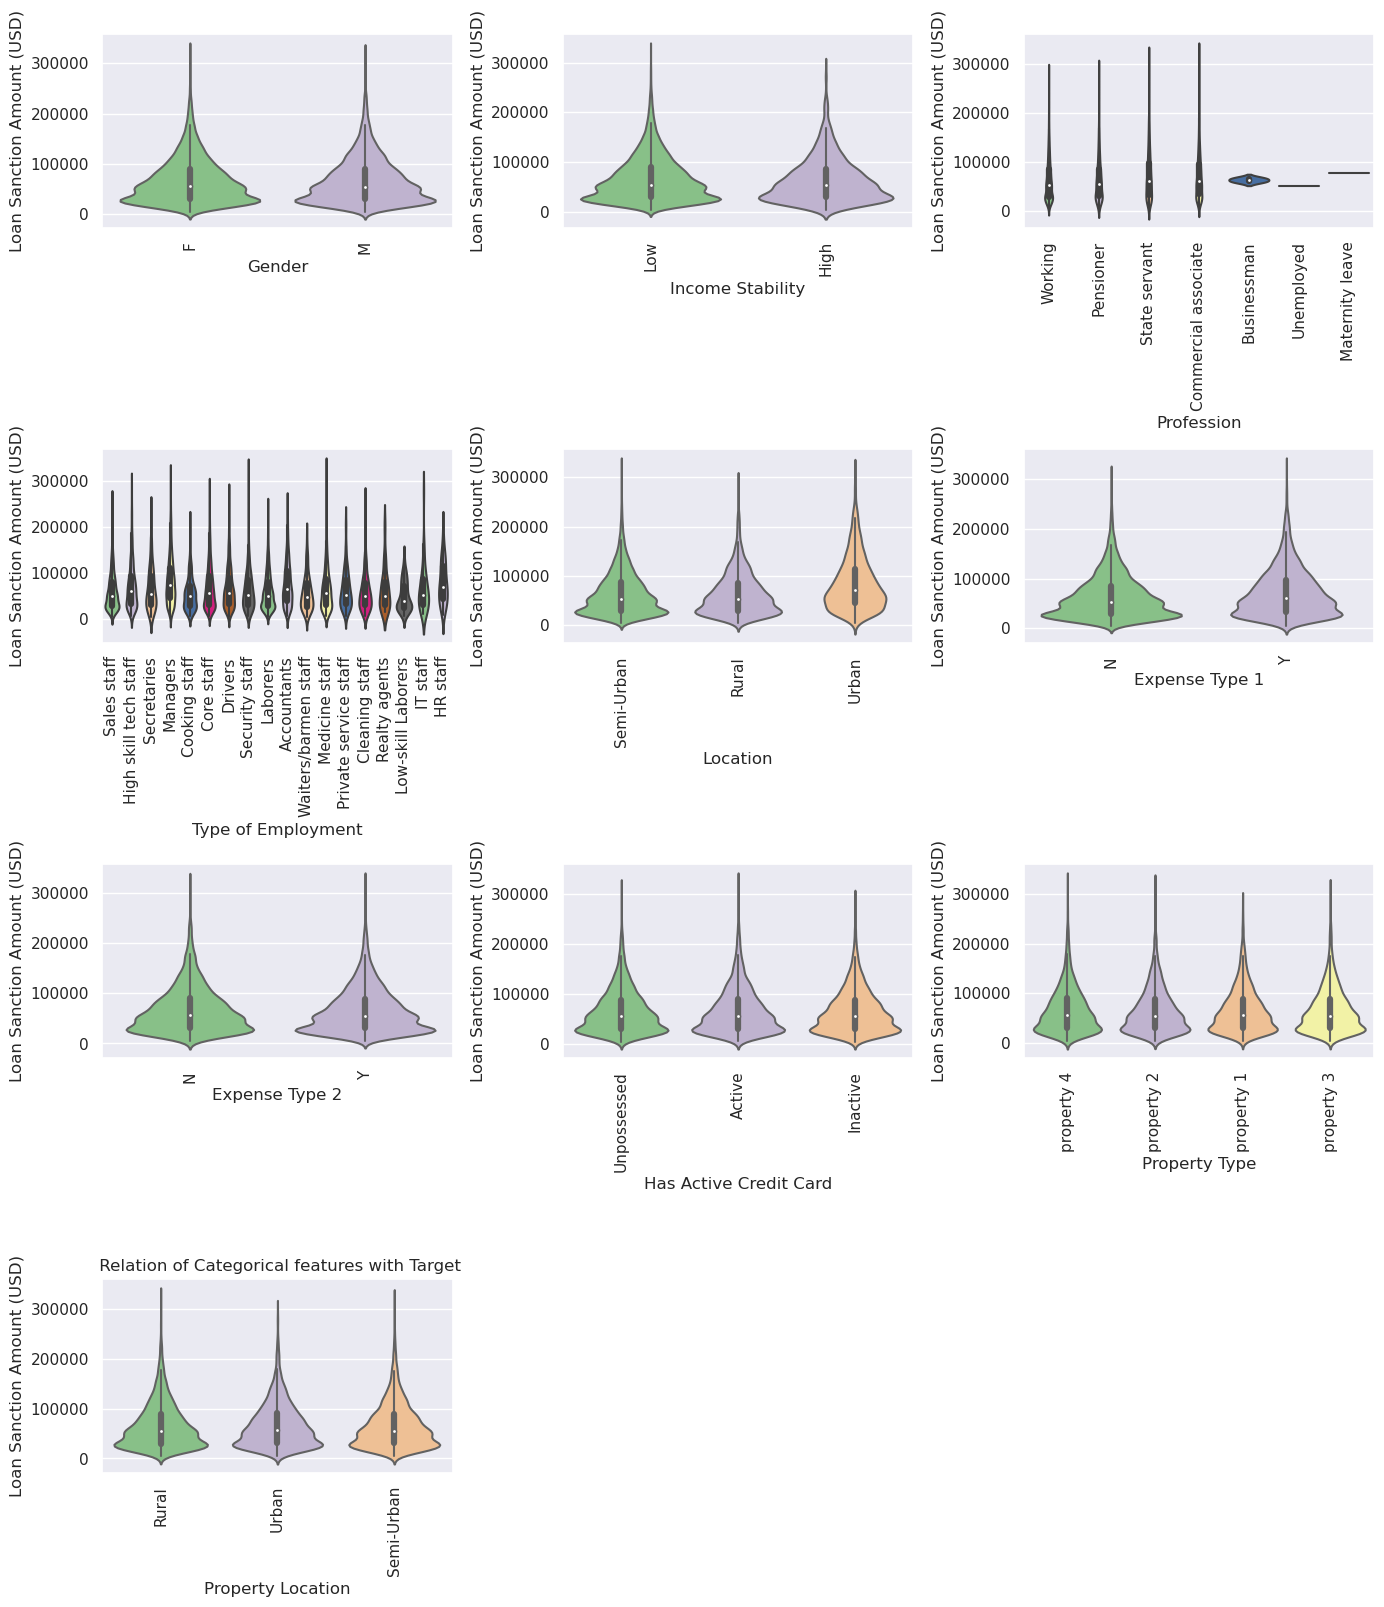

In [52]:
# Some features are very important for regression. But, this time vary hard to recognize it.
# Let's try violin plot
plt.figure(figsize=(14,16))
for index, col in enumerate(cat_cols):
    plt.subplot(4,3, index+1)
    sns.violinplot(x=col, y='Loan Sanction Amount (USD)', data=target_without_zero, palette='Accent')
    plt.xticks(rotation=90)
    
plt.title(' Relation of Categorical features with Target')
plt.tight_layout()

##### As can be seen, features like 'Prefession', 'Types of employement', 'Expense type 1', 'Location', etc are very important features for analysing target variable.

#### Exploting classification features

##### For calssificatio, we use 'Loan sanctioned' feature. But, loan sanction feature is not balanced. First, of all let's balance it using Under sampling technique

In [53]:
# We do not need Loan sanction amount feature as it is our target feature
train_clf = train_dataset.drop(columns=['Loan Sanction Amount (USD)'])
train_clf.head()

Customer ID Gender  Age  Income (USD) Income Stability Profession  \
0     C-36995      F   56       1933.05              Low    Working   
1     C-33999      M   32       4952.91              Low    Working   
2      C-3770      F   65        988.19             High  Pensioner   
3     C-26480      F   65         -1.00             High  Pensioner   
4     C-23459      F   31       2614.77              Low    Working   

      Type of Employment    Location  Loan Amount Request (USD)  \
0            Sales staff  Semi-Urban                   72809.58   
1                    NaN  Semi-Urban                   46837.47   
2                    NaN  Semi-Urban                   45593.04   
3                    NaN       Rural                   80057.92   
4  High skill tech staff  Semi-Urban                  113858.89   

   Current Loan Expenses (USD) Expense Type 1 Expense Type 2  Dependents  \
0                       241.08              N              N         3.0   
1                       495.81              N              Y         1.0   
2                       171.95              N              Y         1.0   
3                       298.54              N              Y         2.0   
4                       491.41              N              Y        -1.0   

   Credit Score  No. of Defaults Has Active Credit Card  Property ID  \
0        809.44                0                    NaN          746   
1        780.40                0            Unpossessed          608   
2        833.15                0            Unpossessed          546   
3        832.70                1            Unpossessed          890   
4        745.55                1                 Active          715   

  Property Type Property Location  Co-Applicant  Property Price  \
0    property 4             Rural             1       119933.46   
1    property 2             Rural             1        54791.00   
2    property 2             Urban             0        72440.58   
3    property 2        Semi-Urban             1       121441.51   
4    property 4        Semi-Urban             1       208567.91   

   Loan sanctioned  
0             True  
1             True  
2             True  
3             True  
4             True

In [54]:
train_clf['Loan sanctioned'].value_counts()

True     20882
False     7770
Name: Loan sanctioned, dtype: int64

In [55]:
# Balancing the dataset
false_count = train_clf['Loan sanctioned'].value_counts()[False]
train_true_sample = train_clf[train_clf['Loan sanctioned']==True].sample(false_count)
train_false_sample = train_clf[train_clf['Loan sanctioned']==False]

train_clf_sample = pd.concat([train_true_sample, train_false_sample])
train_clf_sample['Loan sanctioned'].value_counts()

True     7770
False    7770
Name: Loan sanctioned, dtype: int64

#### Categorical features

Distribution of features with loan sanctioned


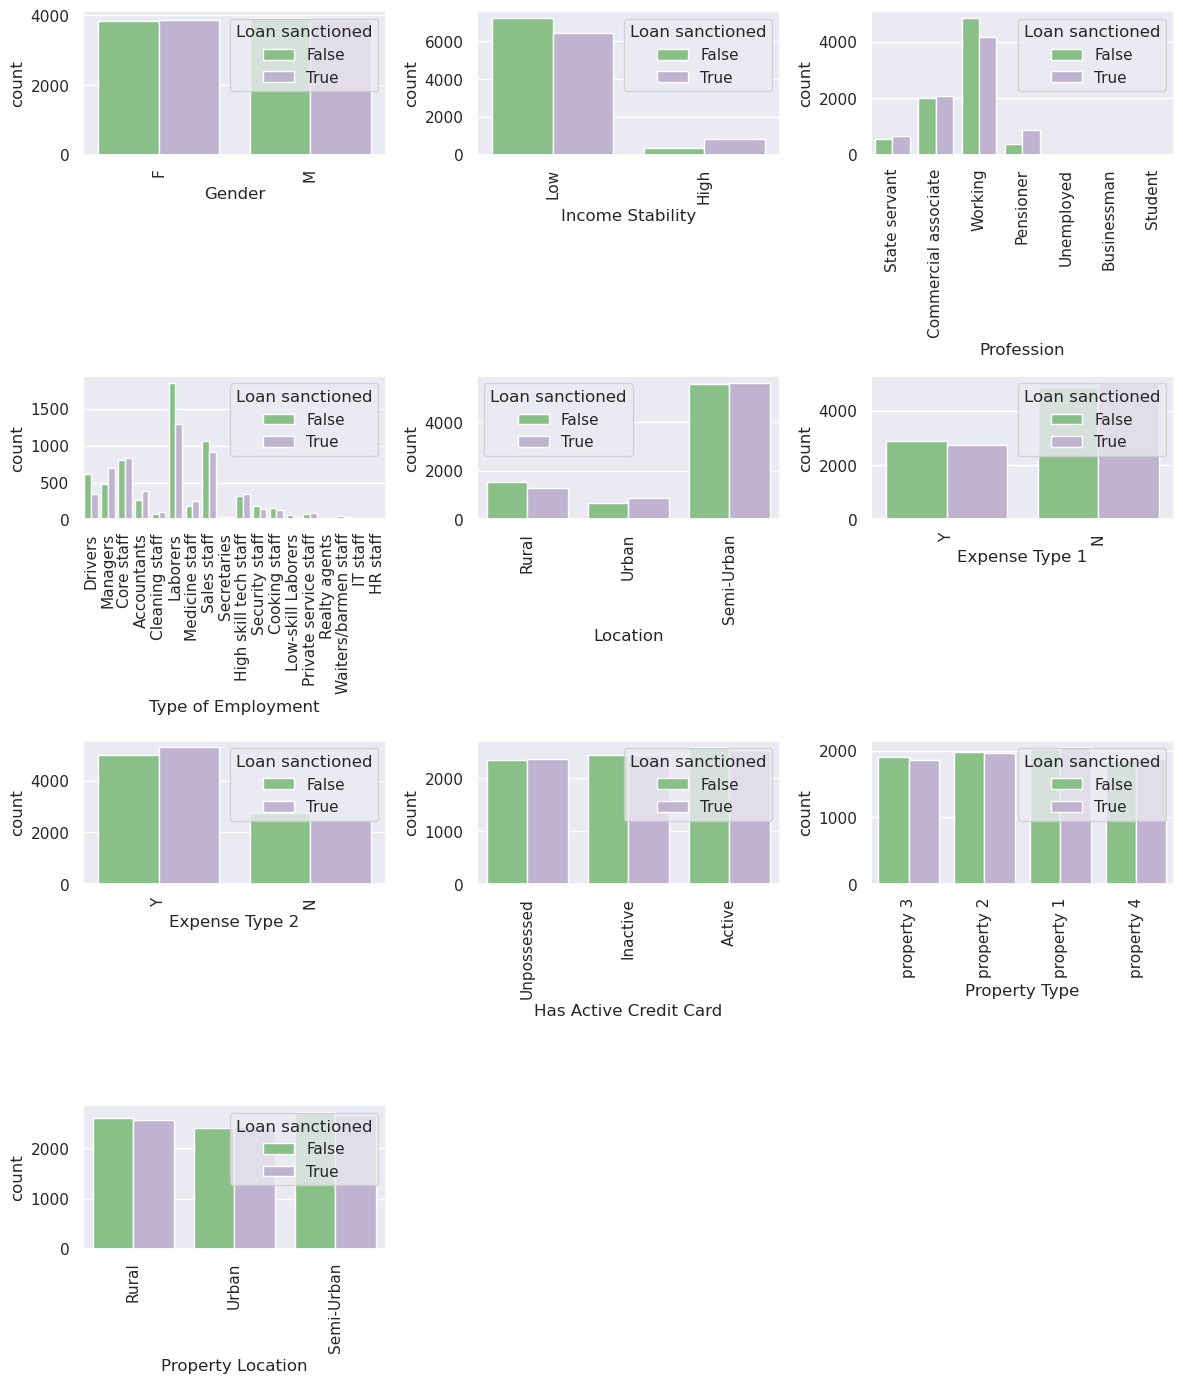

In [56]:
# Relatiob between categorical and loan sanctioned feature
plt.figure(figsize=(12,14))
for index, col in enumerate(cat_cols):
    plt.subplot(4,3, index+1)
    sns.countplot(x=col, hue='Loan sanctioned', data=train_clf_sample, palette='Accent')
    plt.xticks(rotation=90)
    
print('Distribution of features with loan sanctioned')
plt.tight_layout()

##### Features like Income stability, Profession, Type of employment, Expenses type, Location, etc are affecting the loan sanction decision. Income stability has very unbalanced data.

#### Continuous features

Distribution of Continuous features with loan sanctioned


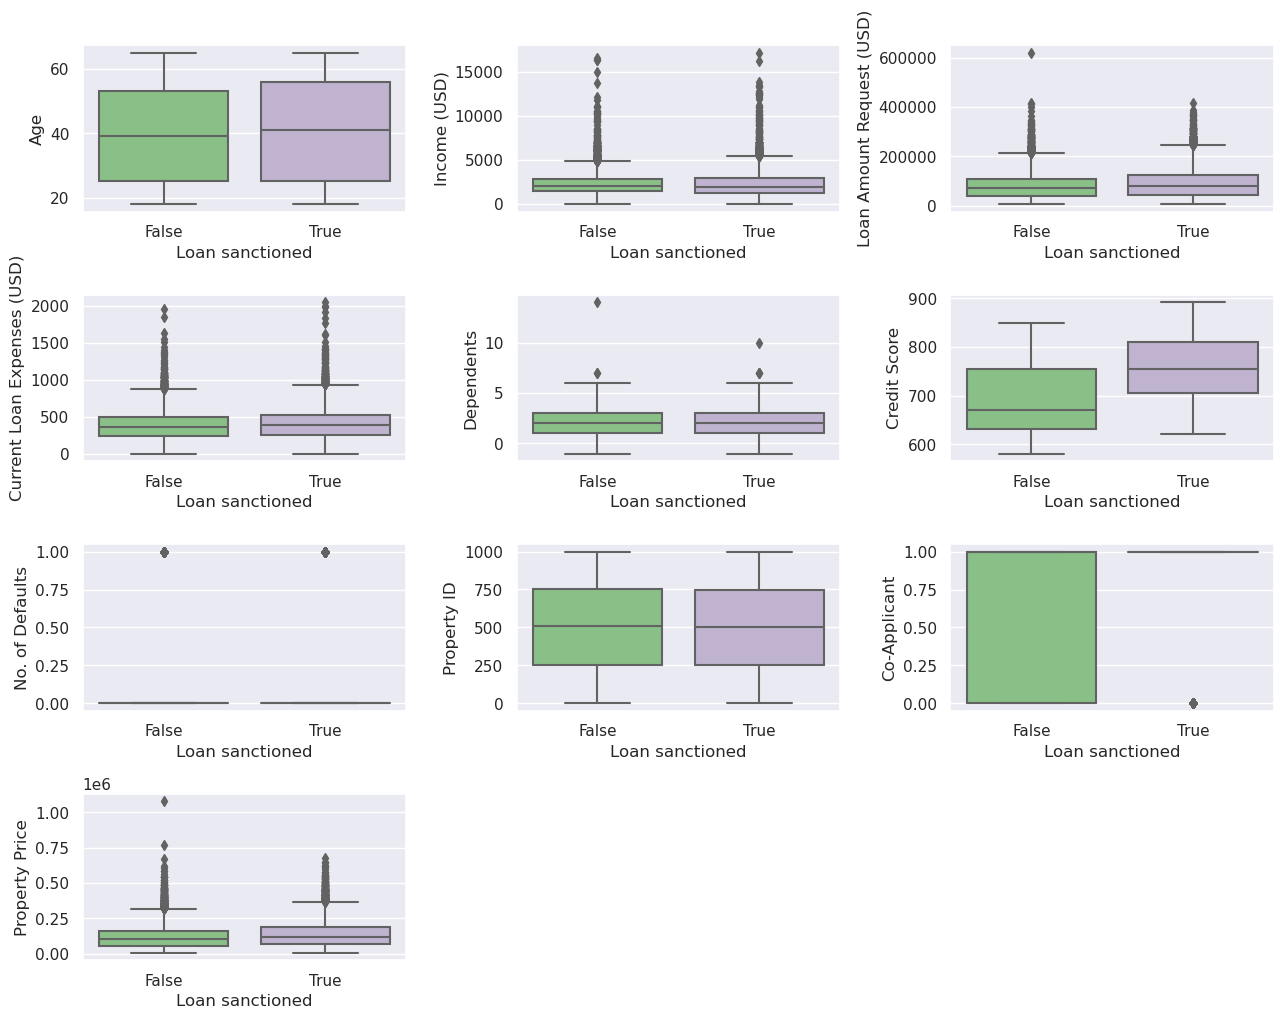

In [57]:
# Relation between continuous features with loan sanctioned
plt.figure(figsize=(13,10))
for index, col in enumerate(con_cols):
    if col == 'Loan Sanction Amount (USD)':
        continue
    plt.subplot(4,3, index+1)
    sns.boxplot(x='Loan sanctioned', y=col, data=train_clf_sample, palette='Accent')
    
print('Distribution of Continuous features with loan sanctioned')
plt.tight_layout()

Distribution of Continuous features with loan sanctioned


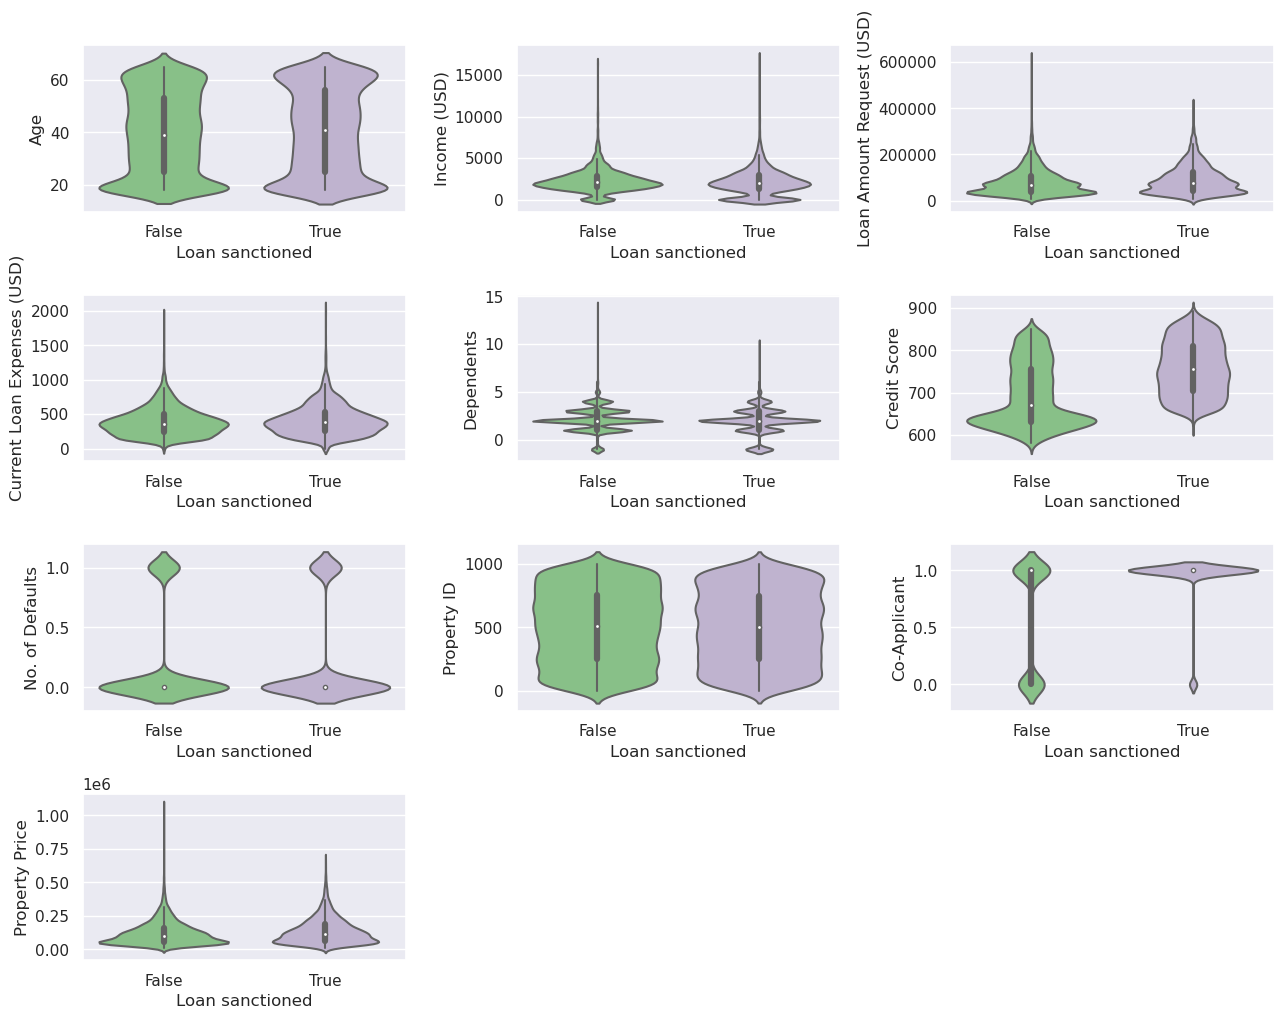

In [58]:
# Using violin plot for more clearer view
plt.figure(figsize=(13,10))
for index, col in enumerate(con_cols):
    if col == 'Loan Sanction Amount (USD)':
        continue
    plt.subplot(4,3, index+1)
    sns.violinplot(x='Loan sanctioned', y=col, data=train_clf_sample, palette='Accent')
    
print('Distribution of Continuous features with loan sanctioned')
plt.tight_layout()

In [59]:
# Creating pivot table for more analysis
co_applicant_table = pd.pivot_table(data=train_clf_sample, index='Co-Applicant', columns='Loan sanctioned', values='Customer ID', aggfunc='count', margins=True)
# Creating false and true percentage
co_applicant_table['False_perc'] = (co_applicant_table[False] / co_applicant_table['All'])*100
co_applicant_table['True_perc'] = (co_applicant_table[True] / co_applicant_table['All'])*100
co_applicant_table

Loan sanctioned  False  True    All  False_perc  True_perc
Co-Applicant                                              
0                 3184   412   3596   88.542825  11.457175
1                 4586  7358  11944   38.395847  61.604153
All               7770  7770  15540   50.000000  50.000000

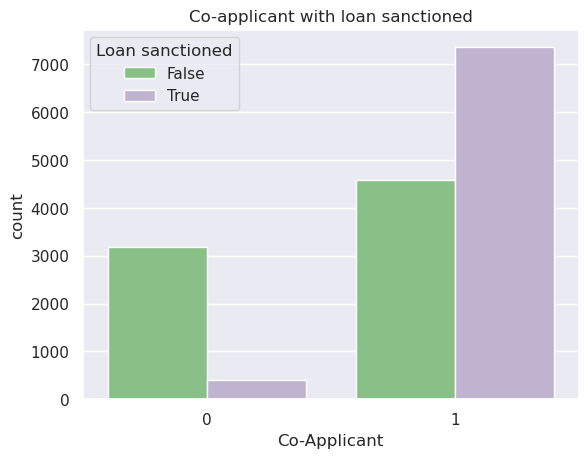

In [60]:
# Analyzing Co-Applicant feature
sns.countplot(x=train_clf_sample['Co-Applicant'], hue=train_clf_sample['Loan sanctioned'], palette='Accent')
plt.title('Co-applicant with loan sanctioned')
plt.show()

In [61]:
# Creating pivot table for more analysis
co_applicant_table = pd.pivot_table(data=train_clf_sample, index='No. of Defaults', columns='Loan sanctioned', values='Customer ID', aggfunc='count', margins=True)
# Creating false and true percentage
co_applicant_table['False_perc'] = (co_applicant_table[False] / co_applicant_table['All'])*100
co_applicant_table['True_perc'] = (co_applicant_table[True] / co_applicant_table['All'])*100
co_applicant_table

Loan sanctioned  False  True    All  False_perc  True_perc
No. of Defaults                                           
0                 6256  6238  12494   50.072035  49.927965
1                 1514  1532   3046   49.704531  50.295469
All               7770  7770  15540   50.000000  50.000000

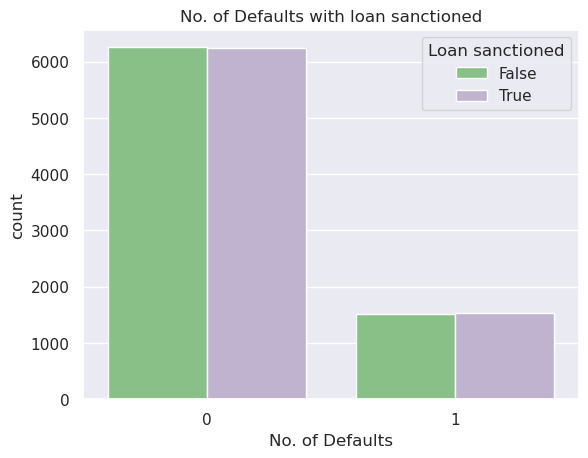

In [62]:
# Analyzing No.of Defaults feature
sns.countplot(x=train_clf_sample['No. of Defaults'], hue=train_clf_sample['Loan sanctioned'], palette='Accent')
plt.title('No. of Defaults with loan sanctioned')
plt.show()

##### Features like loan amount requested, Dependents, Credit score, Income , Co-applicant, etc are important features for our classification model.

In [63]:
train_dataset.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD)', 'Income Stability',
       'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)', 'Loan sanctioned'],
      dtype='object')

In [64]:
train_clf_sample.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD)', 'Income Stability',
       'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan sanctioned'],
      dtype='object')

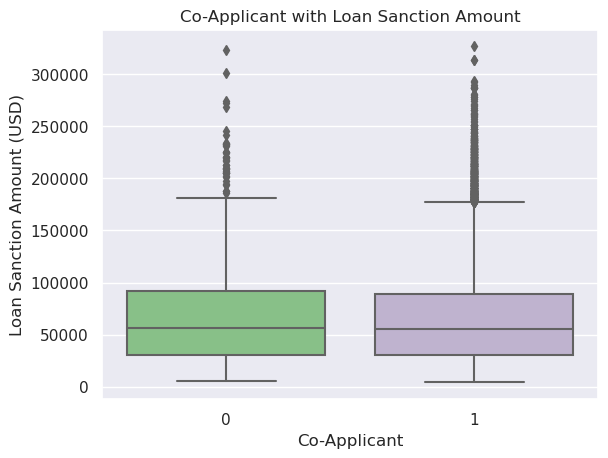

In [65]:
# Checking whether Co-applicant affects loan sanction amount or not
sns.boxplot(x='Co-Applicant', y='Loan Sanction Amount (USD)', data=target_without_zero, palette='Accent')
plt.title('Co-Applicant with Loan Sanction Amount')
plt.show()

Continuous features with Loan sanctioned :


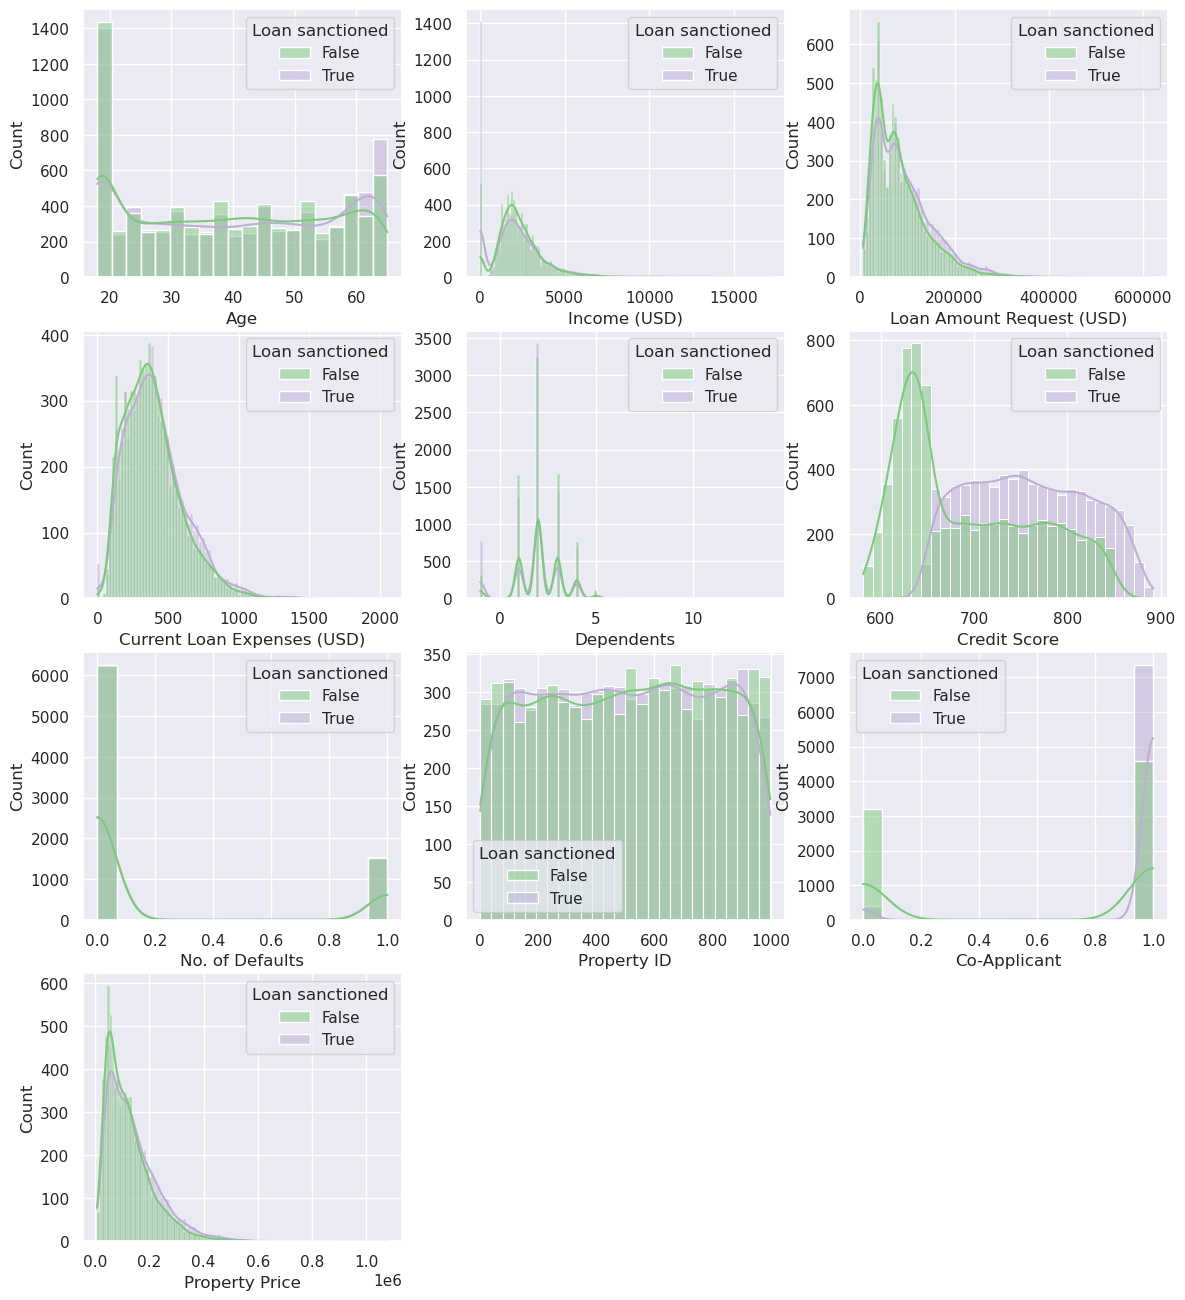

In [66]:
plt.figure(figsize=(14,16))
for index, col in enumerate(con_cols):
    if col =='Loan Sanction Amount (USD)':
        continue
    plt.subplot(4,3, index+1)
    sns.histplot(x=col, hue='Loan sanctioned', data=train_clf_sample, palette='Accent', kde=True)
print('Continuous features with Loan sanctioned :')
plt.show()

##### Let's explore the features individually.

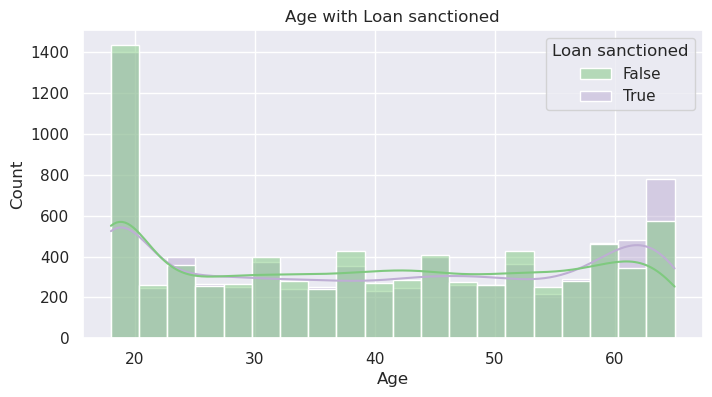

In [67]:
feature = 'Age'

plt.figure(figsize=(8,4))
sns.histplot(x=train_clf_sample[feature], palette='Accent', hue= train_clf_sample['Loan sanctioned'], kde=True)
plt.title('Age with Loan sanctioned')
plt.show()

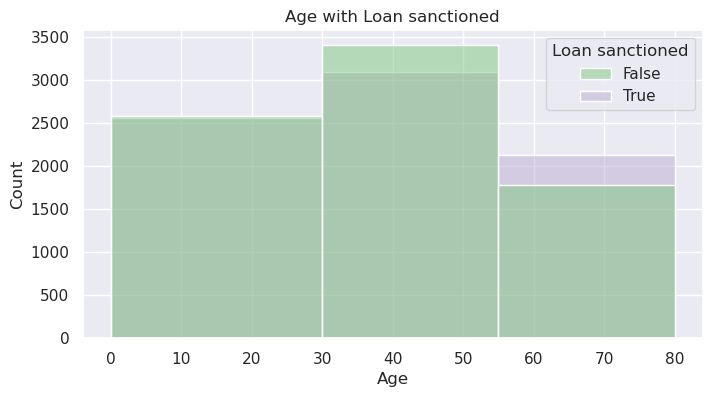

In [68]:
# Creating classes
plt.figure(figsize=(8,4))
sns.histplot(x=train_clf_sample[feature], palette='Accent', bins=[0,30,55,80] ,hue= train_clf_sample['Loan sanctioned'])
plt.title('Age with Loan sanctioned')
plt.show()

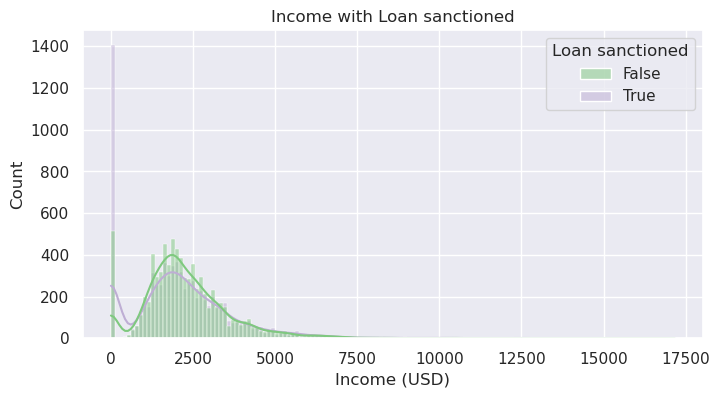

In [69]:
feature = 'Income (USD)'

plt.figure(figsize=(8,4))
sns.histplot(x=train_clf_sample[feature], palette='Accent', hue= train_clf_sample['Loan sanctioned'], kde=True)
plt.title('Income with Loan sanctioned')
plt.show()


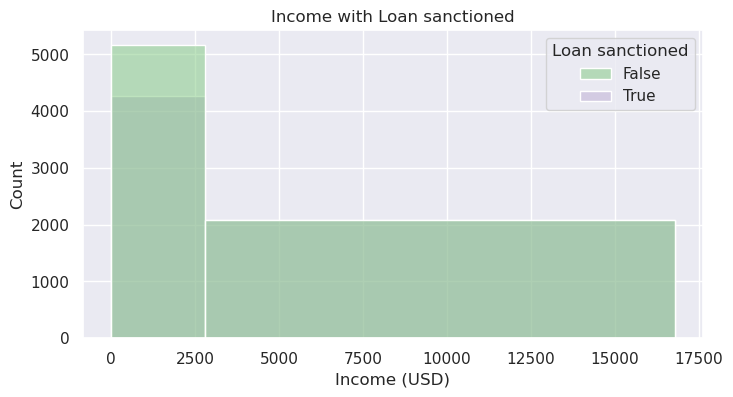

In [70]:
feature = 'Income (USD)'

plt.figure(figsize=(8,4))
sns.histplot(x=train_clf_sample[feature], palette='Accent',bins=[0,2800,16779 ] ,hue= train_clf_sample['Loan sanctioned'])
plt.title('Income with Loan sanctioned')
plt.show()

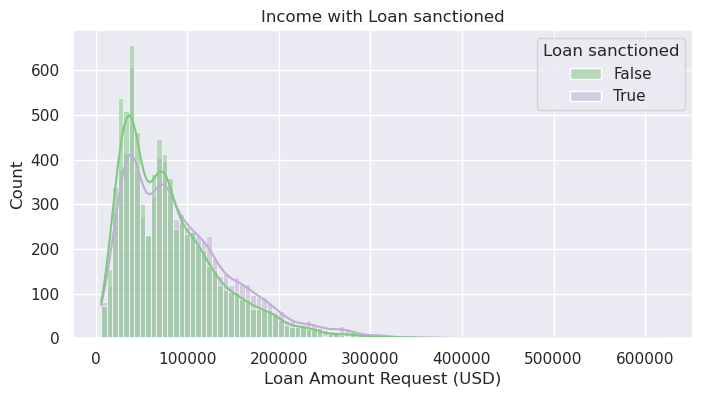

In [71]:
feature = 'Loan Amount Request (USD)'

plt.figure(figsize=(8,4))
sns.histplot(x=train_clf_sample[feature], palette='Accent' ,hue= train_clf_sample['Loan sanctioned'], kde=True)
plt.title('Income with Loan sanctioned')
plt.show()

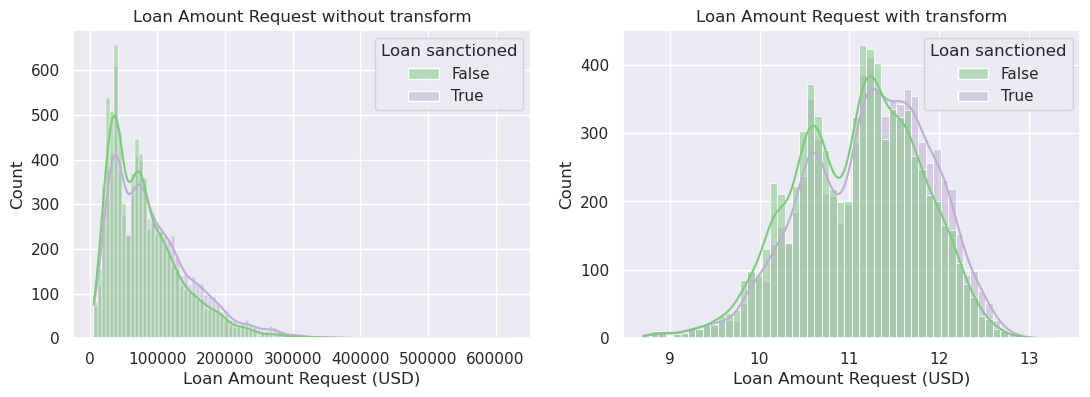

In [72]:
# Checking the distribution after applying log transform
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.histplot(x=train_clf_sample['Loan Amount Request (USD)'], palette='Accent', hue= train_clf_sample['Loan sanctioned'], kde=True)
plt.title('Loan Amount Request without transform')

plt.subplot(1,2,2)
sns.histplot(x=np.log(train_clf_sample['Loan Amount Request (USD)']), palette='Accent', hue=train_clf_sample['Loan sanctioned'], kde=True)
plt.title('Loan Amount Request with transform')

plt.show()

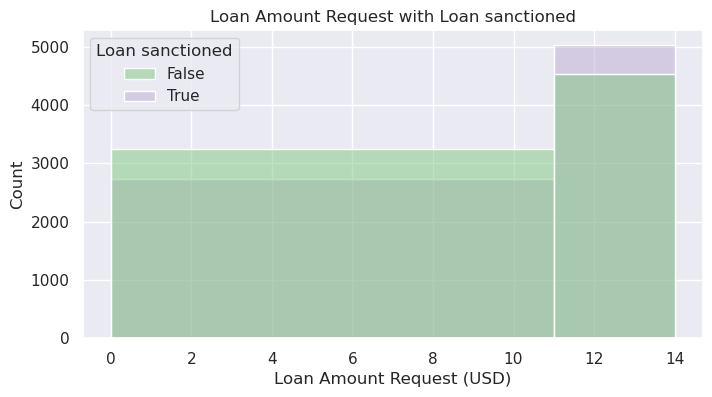

In [73]:
feature = np.log(train_clf_sample['Loan Amount Request (USD)'])

plt.figure(figsize=(8,4))
sns.histplot(x=feature, palette='Accent' ,bins=[0,11,14],hue= train_clf_sample['Loan sanctioned'])
plt.title('Loan Amount Request with Loan sanctioned')
plt.show()

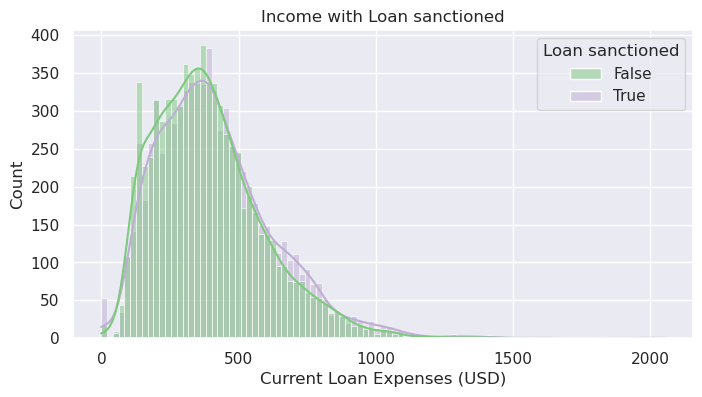

In [74]:
feature = 'Current Loan Expenses (USD)'

plt.figure(figsize=(8,4))
sns.histplot(x=train_clf_sample[feature], palette='Accent' ,hue= train_clf_sample['Loan sanctioned'], kde=True)
plt.title('Income with Loan sanctioned')
plt.show()

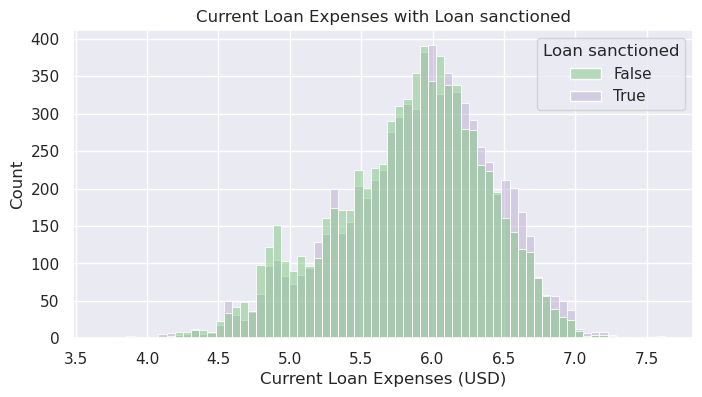

In [75]:
feature = np.log(train_clf_sample['Current Loan Expenses (USD)'][train_clf_sample['Current Loan Expenses (USD)']>0])

plt.figure(figsize=(8,4))
sns.histplot(x=feature, palette='Accent',hue= train_clf_sample['Loan sanctioned'])
plt.title('Current Loan Expenses with Loan sanctioned')
plt.show()

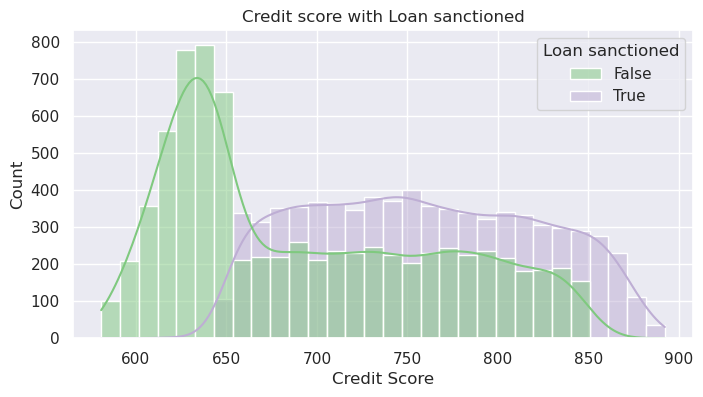

In [76]:
feature = 'Credit Score'

plt.figure(figsize=(8,4))
sns.histplot(x=train_clf_sample[feature], palette='Accent' ,hue= train_clf_sample['Loan sanctioned'], kde=True)
plt.title('Credit score with Loan sanctioned')
plt.show()

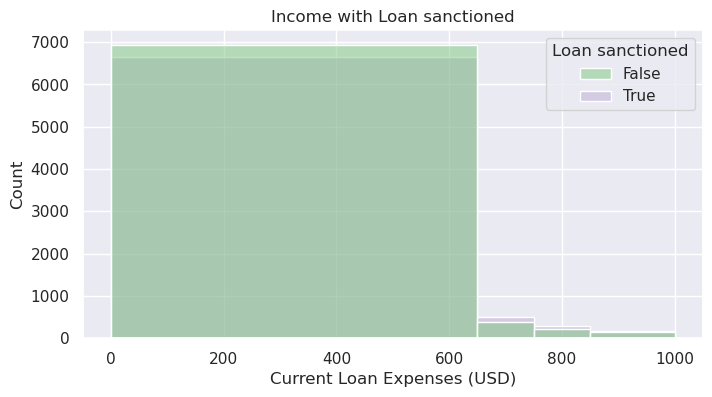

In [77]:
feature = 'Current Loan Expenses (USD)'

plt.figure(figsize=(8,4))
sns.histplot(x=train_clf_sample[feature], palette='Accent' ,bins=[0,650,750,850,1000],hue= train_clf_sample['Loan sanctioned'])
plt.title('Income with Loan sanctioned')
plt.show()

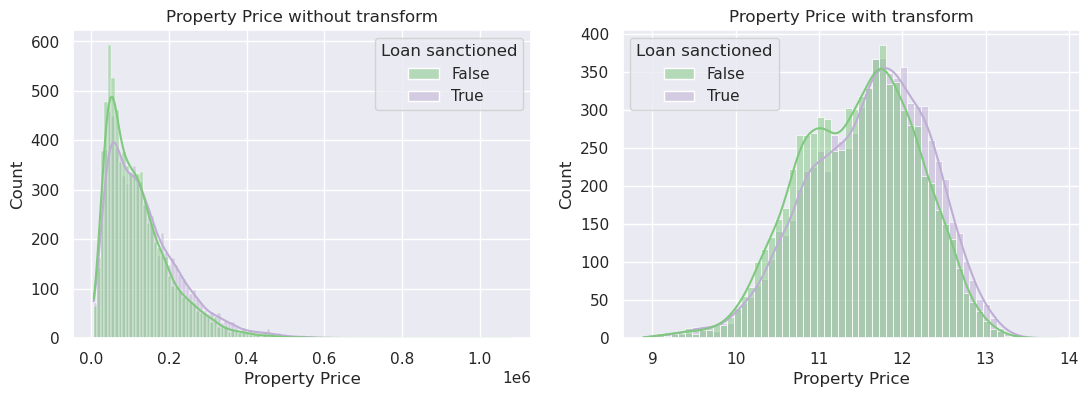

In [78]:
# Checking the distribution after applying log transform
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.histplot(x=train_clf_sample['Property Price'], palette='Accent', hue= train_clf_sample['Loan sanctioned'], kde=True)
plt.title('Property Price without transform')

plt.subplot(1,2,2)
sns.histplot(x=np.log(train_clf_sample['Property Price']), palette='Accent', hue=train_clf_sample['Loan sanctioned'], kde=True)
plt.title('Property Price with transform')

plt.show()

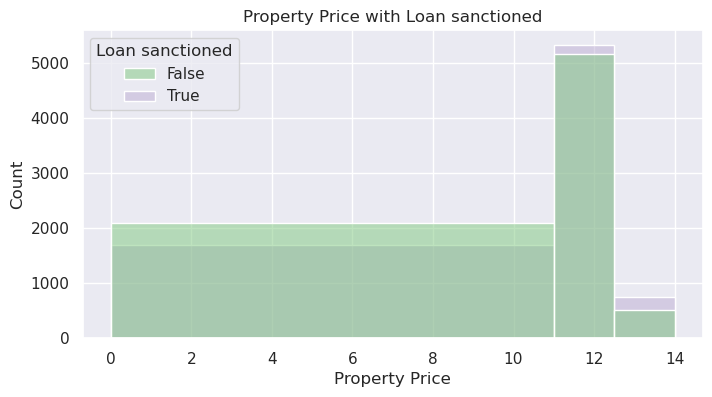

In [79]:
feature = np.log(train_clf_sample['Property Price'][train_clf_sample['Property Price']>0])

plt.figure(figsize=(8,4))
sns.histplot(x=feature, palette='Accent', bins=[0,11,12.5,14],hue= train_clf_sample['Loan sanctioned'])
plt.title('Property Price with Loan sanctioned')
plt.show()

##### Credit score and Dependents are important features for determination of loan sanction amount.

## Handling Missing Values

##### First of all, we need to divide our training dataset into train and validation set

In [80]:
from sklearn.model_selection import train_test_split
train_set, validation_set = train_test_split(train_dataset, test_size=0.2, random_state=10)

# Checking our split
info = ['mean', 'std']
print('Train Set :')
display(train_set.describe().loc[info] ) #  For train set
print('Validation Set :')
display(validation_set.describe().loc[info])  # For validation set

Train Set :


Age  Income (USD)  Loan Amount Request (USD)  \
mean  40.122202   2159.253950               88706.379386   
std   16.038083   1562.082077               59567.597079   

      Current Loan Expenses (USD)  Dependents  Credit Score  No. of Defaults  \
mean                   406.383804    1.983552    740.164741         0.193491   
std                    217.330070    1.275607     72.254031         0.395043   

      Property ID  Co-Applicant  Property Price  Loan Sanction Amount (USD)  
mean   502.622791      0.852493   133142.729065                47837.914376  
std    288.208643      0.354618    93131.610303                48089.872848

Validation Set :


Age  Income (USD)  Loan Amount Request (USD)  \
mean  40.130518   2168.510583               88907.785123   
std   16.162484   1546.819036               58066.681492   

      Current Loan Expenses (USD)  Dependents  Credit Score  No. of Defaults  \
mean                   405.569829    2.017972    739.392433         0.195428   
std                    208.468388    1.262090     71.688054         0.396565   

      Property ID  Co-Applicant  Property Price  Loan Sanction Amount (USD)  
mean    499.04973      0.852207   133097.771960                48571.556205  
std     287.79345      0.354925    89432.221395                48005.587844

##### The split looks similar. Now, we will reset the index so that they can be identified easily when we add train, valid and test set.

In [81]:
train_size= train_set.shape[0]
validation_size = validation_set.shape[0]
test_size = test_dataset.shape[0]

# Setting index for train, validation and test set
train_set.index = pd.RangeIndex(start=0, stop=train_size, step=1)
validation_set.index = pd.RangeIndex(start=train_size, stop=train_size+ validation_size, step=1)
test_dataset.index = pd.RangeIndex(start=train_size+ validation_size, stop=test_size+ train_size + validation_size, step=1)

In [82]:
train_set[train_set['Loan Sanction Amount (USD)']>0].shape

(16706, 23)

In [83]:
no_of_rows = train_set.shape[0]
missing_counts = train_set.isna().sum().sort_values(ascending=False).to_frame(name='missing_counts')
missing_counts['missing_percent'] = np.round((missing_counts['missing_counts'] / no_of_rows)*100, 2)
missing_counts

missing_counts  missing_percent
Type of Employment                     5564            24.27
Credit Score                           1268             5.53
Income Stability                       1268             5.53
Has Active Credit Card                 1169             5.10
Property Location                       259             1.13
Gender                                   35             0.15
Customer ID                               0             0.00
Loan Sanction Amount (USD)                0             0.00
Property Price                            0             0.00
Co-Applicant                              0             0.00
Property Type                             0             0.00
Property ID                               0             0.00
No. of Defaults                           0             0.00
Expense Type 2                            0             0.00
Dependents                                0             0.00
Expense Type 1                            0             0.00
Current Loan Expenses (USD)               0             0.00
Loan Amount Request (USD)                 0             0.00
Location                                  0             0.00
Profession                                0             0.00
Income (USD)                              0             0.00
Age                                       0             0.00
Loan sanctioned                           0             0.00

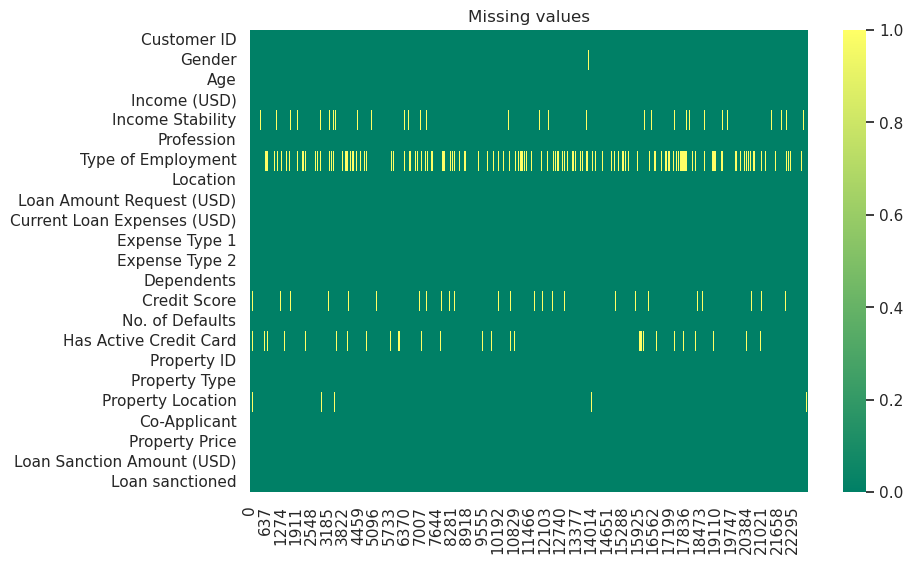

In [84]:
plt.figure(figsize=(9,6))
sns.heatmap(train_set.isna().T, cmap='summer')
plt.title('Missing values')
plt.show()

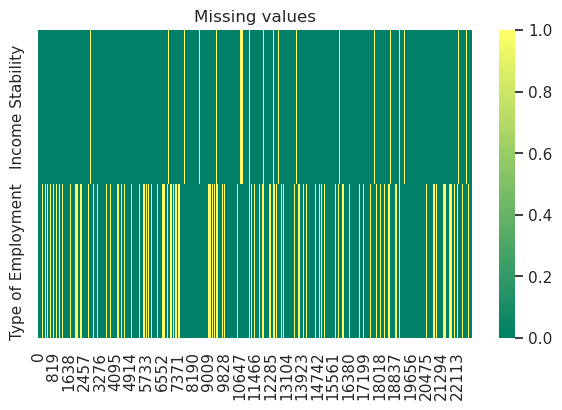

In [85]:
plt.figure(figsize=(7,4))
sns.heatmap(train_set[['Income Stability', 'Type of Employment']].isna().T, cmap='summer')
plt.title('Missing values')
plt.show()

##### Missing values looks random and does not link to each other

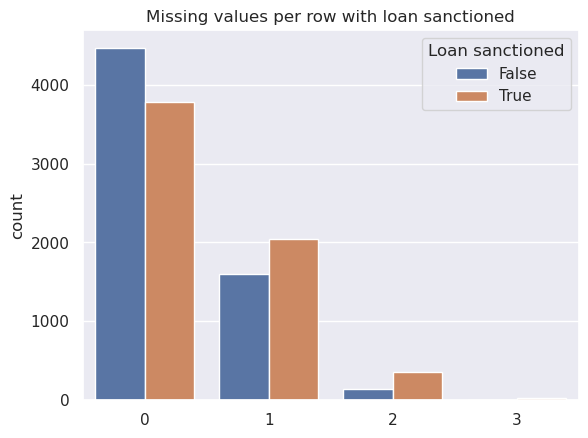

In [86]:
false_sample = train_set[train_set['Loan sanctioned']==False]
true_sample = train_set[train_set['Loan sanctioned']==True].sample(false_sample.shape[0])

# Merging false and true sample for balancing the dataset
temp_df = pd.concat([false_sample, true_sample])
missing_per_rows = temp_df.isna().sum(axis=1)

sns.countplot(x=missing_per_rows, hue='Loan sanctioned', data=temp_df)
plt.title('Missing values per row with loan sanctioned')
plt.show()

In [87]:
# Creating new dataframe to store all the data from train , validataion and test set. By doing this, we do not have to fill the missing values separately.
# But, we do model training only from train set

df_main = pd.concat([train_set, validation_set, test_dataset])
df_main.head()

Customer ID Gender  Age  Income (USD) Income Stability  \
0     C-13955      F   30       1576.77              Low   
1     C-23437      M   22       1498.83              Low   
2      C-4697      F   18       2302.50              Low   
3      C-7493      F   46       4161.25              Low   
4     C-47834      F   29       1524.03              Low   

             Profession Type of Employment    Location  \
0               Working            Drivers  Semi-Urban   
1               Working         Core staff  Semi-Urban   
2               Working           Laborers       Urban   
3         State servant     Medicine staff  Semi-Urban   
4  Commercial associate           Laborers       Rural   

   Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
0                  154008.02                       608.09              Y   
1                   13267.45                       137.48              N   
2                   93118.73                       404.00              N   
3                   23025.96                       117.17              N   
4                   70108.84                       531.45              Y   

  Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0              Y         2.0        657.57                0   
1              N         1.0        743.54                0   
2              Y         3.0        829.12                0   
3              Y         2.0        707.01                0   
4              N         3.0        684.29                0   

  Has Active Credit Card  Property ID Property Type Property Location  \
0                 Active          268    property 4             Urban   
1               Inactive          549    property 4             Rural   
2                 Active           35    property 3             Urban   
3                 Active          753    property 3             Rural   
4            Unpossessed           91    property 3             Urban   

   Co-Applicant  Property Price  Loan Sanction Amount (USD) Loan sanctioned  
0           1.0       282095.31                   107805.61            True  
1           1.0        22477.46                     9287.22            True  
2           1.0       144847.06                    69839.05            True  
3           1.0        28062.99                    16118.17            True  
4           1.0        83208.46                        0.00           False

##### We will use one feature that does not have any missing values to impute the missing values of other feature.

In [88]:
train_set.isna().sum().sort_values(ascending=False)

Type of Employment             5564
Credit Score                   1268
Income Stability               1268
Has Active Credit Card         1169
Property Location               259
Gender                           35
Customer ID                       0
Loan Sanction Amount (USD)        0
Property Price                    0
Co-Applicant                      0
Property Type                     0
Property ID                       0
No. of Defaults                   0
Expense Type 2                    0
Dependents                        0
Expense Type 1                    0
Current Loan Expenses (USD)       0
Loan Amount Request (USD)         0
Location                          0
Profession                        0
Income (USD)                      0
Age                               0
Loan sanctioned                   0
dtype: int64

In [89]:
train_set[train_set['Property Location'].isna()]

Customer ID Gender  Age  Income (USD) Income Stability  \
115       C-15042      F   47       1594.26              Low   
214       C-29083      F   57       1389.22              Low   
382       C-24768      M   24       1588.20              Low   
413        C-9075      F   42       1260.04              Low   
430       C-19082      M   26       1570.98              Low   
...           ...    ...  ...           ...              ...   
22673     C-14290      M   49        936.04              Low   
22762      C-5750      F   65       1600.95             High   
22796      C-9112      M   31       2645.88              Low   
22871     C-14289      F   18       2376.70              Low   
22887     C-17251      F   32       2177.89              Low   

                 Profession     Type of Employment    Location  \
115    Commercial associate  High skill tech staff  Semi-Urban   
214    Commercial associate            Sales staff  Semi-Urban   
382                 Working               Laborers  Semi-Urban   
413    Commercial associate               Laborers  Semi-Urban   
430                 Working         Medicine staff  Semi-Urban   
...                     ...                    ...         ...   
22673  Commercial associate               Laborers  Semi-Urban   
22762             Pensioner                    NaN  Semi-Urban   
22796  Commercial associate                    NaN  Semi-Urban   
22871               Working         Medicine staff       Rural   
22887               Working                    NaN  Semi-Urban   

       Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
115                     20807.31                       105.86              N   
214                     25797.15                       124.97              N   
382                     13823.96                       175.68              Y   
413                     18756.07                        99.78              Y   
430                     14852.27                       150.31              Y   
...                          ...                          ...            ...   
22673                   62171.00                       199.32              N   
22762                   50755.00                       188.24              N   
22796                   43096.97                       228.83              N   
22871                   85991.32                       342.02              N   
22887                  120546.85                       360.67              N   

      Expense Type 2  Dependents  Credit Score  No. of Defaults  \
115                Y         1.0           NaN                0   
214                Y         2.0        657.07                0   
382                Y        -1.0        816.83                0   
413                N        -1.0        637.20                0   
430                Y         1.0        736.75                1   
...              ...         ...           ...              ...   
22673              N         1.0        667.71                0   
22762              Y         2.0        841.83                0   
22796              Y         3.0        762.73                1   
22871              Y         2.0        744.82                0   
22887              N         1.0        651.13                1   

      Has Active Credit Card  Property ID Property Type Property Location  \
115                      NaN          403    property 3               NaN   
214                 Inactive          796    property 1               NaN   
382                 Inactive          532    property 3               NaN   
413                      NaN          865    property 1               NaN   
430                   Active          250    property 4               NaN   
...                      ...          ...           ...               ...   
22673               Inactive          818    property 2               NaN   
22762               Inactive          830    property 2       

In [90]:
# We will see the relation between Property ID and Property Location
train_set[train_set['Property ID']==796][['Property ID', 'Property Location']].sample(5)

Property ID Property Location
19607          796             Rural
15711          796             Rural
7870           796             Rural
13213          796             Rural
19639          796             Rural

In [91]:
PPL_gb = train_set.groupby(['Property ID', 'Property Location'])['Customer ID'].size().unstack().fillna(0)
PPL_gb.head()

Property Location  Rural  Semi-Urban  Urban
Property ID                                
1                    0.0         0.0   26.0
2                    0.0         0.0   15.0
3                    0.0         0.0   18.0
4                    0.0        24.0    0.0
5                    0.0        19.0    0.0

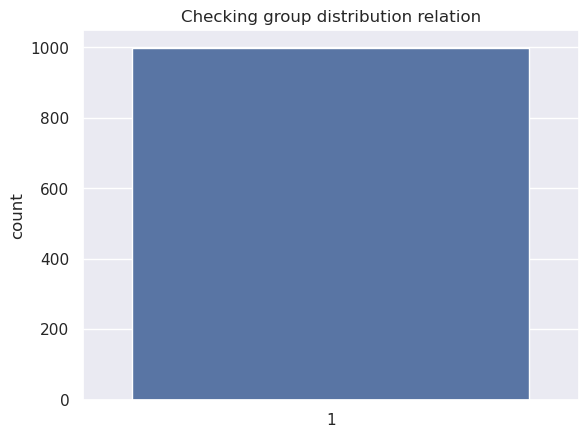

In [92]:
# Checking if row in group distribution has only one value or not
sns.countplot(x=(PPL_gb > 0).sum(axis=1))
plt.title('Checking group distribution relation')
plt.show()

##### As can be seen, property Location is always same for each property ID. So, we will use property ID to impute missing values of property location

In [93]:
df_main[df_main['Property Location'].isna()].index

Int64Index([  115,   214,   382,   413,   430,   476,   665,   718,   822,
              967,
            ...
            47525, 47735, 47755, 47997, 48122, 48213, 48246, 48476, 48513,
            48622],
           dtype='int64', length=484)

In [94]:
PL_nulls = df_main['Property Location'].isna().sum()
null_index = df_main[(df_main['Property Location'].isna()) & (df_main['Property ID'].isin(PPL_gb.index))].index  # Extracting null index
# Imputing null values
df_main.loc[null_index, 'Property Location'] = df_main.loc[null_index, 'Property ID'].apply(lambda x : PPL_gb.loc[x].idxmax())

# Checking for null values before and after imputation
print(f'Total no. of missing values before imputation is {PL_nulls}')
print(f"Total no. of missing values after imputation is {df_main['Property Location'].isna().sum()}")

Total no. of missing values before imputation is 484
Total no. of missing values after imputation is 0


In [95]:
train_set.isna().sum().sort_values(ascending=False)

Type of Employment             5564
Credit Score                   1268
Income Stability               1268
Has Active Credit Card         1169
Property Location               259
Gender                           35
Customer ID                       0
Loan Sanction Amount (USD)        0
Property Price                    0
Co-Applicant                      0
Property Type                     0
Property ID                       0
No. of Defaults                   0
Expense Type 2                    0
Dependents                        0
Expense Type 1                    0
Current Loan Expenses (USD)       0
Loan Amount Request (USD)         0
Location                          0
Profession                        0
Income (USD)                      0
Age                               0
Loan sanctioned                   0
dtype: int64

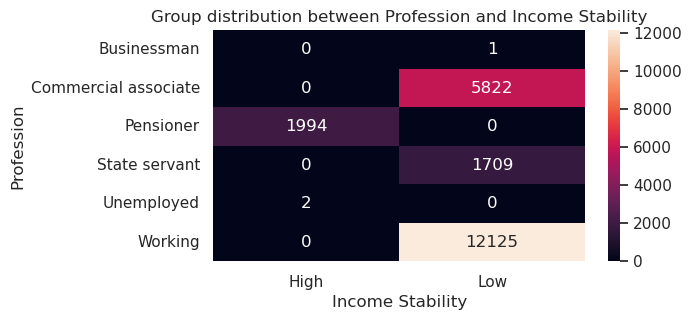

In [96]:
PIS_gb = train_set.groupby(['Profession', 'Income Stability']).size().unstack().fillna(0)
# Plotting heatmap
plt.figure(figsize=(6,3))
sns.heatmap(PIS_gb, annot=True, fmt='g')
plt.title('Group distribution between Profession and Income Stability')
plt.show()

In [97]:
# We can use pivot table also
train_set.pivot_table(index='Profession', columns='Income Stability', values='Customer ID', aggfunc='count').fillna(0)

Income Stability        High      Low
Profession                           
Businessman              0.0      1.0
Commercial associate     0.0   5822.0
Pensioner             1994.0      0.0
State servant            0.0   1709.0
Unemployed               2.0      0.0
Working                  0.0  12125.0

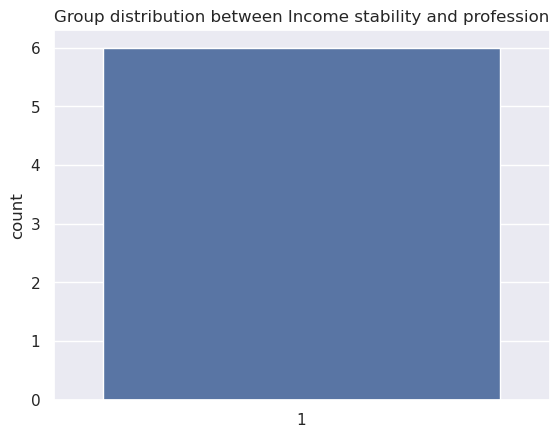

In [98]:
# Checking whether Income stability has only one value or not
sns.countplot(x=(PIS_gb >0).sum(axis=1))
plt.title('Group distribution between Income stability and profession')
plt.show()

In [99]:
df_main[df_main['Income Stability'].isna()].index

Int64Index([   14,    37,    42,    43,    83,    93,   137,   193,   206,
              244,
            ...
            48326, 48343, 48347, 48351, 48359, 48408, 48442, 48458, 48568,
            48622],
           dtype='int64', length=2385)

In [100]:
Income_stability_nulls = df_main['Income Stability'].isna().sum()  

null_index = df_main[(df_main['Income Stability'].isna()) & (df_main['Profession'].isin(PIS_gb.index))].index  # Null index
# Imputing missing values
df_main.loc[null_index, 'Income Stability'] = df_main.loc[null_index, 'Profession'].apply(lambda x: PIS_gb.loc[x].idxmax())

# Checking missing values before and after imputation
print(f"Number of missing values before imputation is {Income_stability_nulls}")
print(f"Number of missing values after imputation is {df_main['Income Stability'].isna().sum()}")

Number of missing values before imputation is 2385
Number of missing values after imputation is 1


In [101]:
df_main[df_main['Income Stability'].isna()][['Profession', 'Income Stability']]

Profession Income Stability
2776    Student              NaN

In [102]:
# Assuming Income stability of student as low
df_main.loc[df_main['Income Stability'].isna(), 'Income Stability']='Low'
print(f"Number of missing values after imputation is {df_main['Income Stability'].isna().sum()}")

Number of missing values after imputation is 0


In [103]:
# Function for quickly updating train, validation and test set
def get_train_validation_test(df):
    df_train = df_main.loc[df_main['Customer ID'].isin(train_set['Customer ID'])]
    df_validation = df_main.loc[df_main['Customer ID'].isin(validation_set['Customer ID'])]
    df_test = df_main.loc[df_main['Customer ID'].isin(test_dataset['Customer ID'])]
    
    return df_train, df_validation, df_test

# Updating dataset
train_set, validation_set, test_dataset = get_train_validation_test(df_main)

In [104]:
train_set['Income Stability'].isna().sum()

0

In [105]:
train_set.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD)', 'Income Stability',
       'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)', 'Loan sanctioned'],
      dtype='object')

In [106]:
train_set['Type of Employment'].unique()

array(['Drivers', 'Core staff', 'Laborers', 'Medicine staff', 'Managers',
       nan, 'High skill tech staff', 'Accountants',
       'Private service staff', 'Sales staff', 'Cleaning staff',
       'Low-skill Laborers', 'Cooking staff', 'Secretaries', 'HR staff',
       'Waiters/barmen staff', 'Security staff', 'IT staff',
       'Realty agents'], dtype=object)

In [107]:
train_set['Profession'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman'], dtype=object)

In [108]:
train_set[train_set['Profession']=='Pensioner'][['Profession', 'Type of Employment']].sample(10)

Profession Type of Employment
1065   Pensioner                NaN
11996  Pensioner                NaN
16105  Pensioner                NaN
9588   Pensioner                NaN
7170   Pensioner                NaN
11645  Pensioner                NaN
19348  Pensioner                NaN
4246   Pensioner                NaN
3728   Pensioner                NaN
11494  Pensioner                NaN

##### It seems that there is no value assigned for Profession category on Type of Employment feature. So, we will assign a new category for it (i.e. Retired)

In [109]:
df_main.loc[df_main['Profession']=='Pensioner', 'Type of Employment']= 'Retired'

In [110]:
# Assigning new category for Unemployed (i.e. Unknown) for Type of Employment feature
df_main.loc[df_main['Profession']=='Unemployed', 'Type of Employment']= 'Unknown'

In [111]:
df_main['Type of Employment'].isna().mean()

0.1489352955685275

##### Still 23% of values are missing. I could not find any way to impute those values. So, let's create a new category named as 'Not available'

In [112]:
df_main['Type of Employment'] = df_main['Type of Employment'].fillna('Not available')

In [113]:
df_main['Type of Employment'].isna().sum()

0

In [114]:
# Updating train, validation and test dataset
train_set, validation_set, test_dataset = get_train_validation_test(df_main)

In [115]:
train_set.isna().sum().sort_values(ascending=False)

Credit Score                   1268
Has Active Credit Card         1169
Gender                           35
Customer ID                       0
Dependents                        0
Loan Sanction Amount (USD)        0
Property Price                    0
Co-Applicant                      0
Property Location                 0
Property Type                     0
Property ID                       0
No. of Defaults                   0
Expense Type 2                    0
Expense Type 1                    0
Current Loan Expenses (USD)       0
Loan Amount Request (USD)         0
Location                          0
Type of Employment                0
Profession                        0
Income Stability                  0
Income (USD)                      0
Age                               0
Loan sanctioned                   0
dtype: int64

In [116]:
# Using median value to impute Credit Score feature
Credit_score_nulls = train_set['Credit Score'].isna().sum()
median_value = train_set['Credit Score'].median()

df_main['Credit Score'] = df_main['Credit Score'].fillna(median_value)

print(f"Number of missing values before is {Credit_score_nulls}")
print(f"Number of missing values after is {df_main['Credit Score'].isna().sum()}")

Number of missing values before is 1268
Number of missing values after is 0


In [117]:
train_set['Gender'].value_counts()

M    11488
F    11398
Name: Gender, dtype: int64

In [118]:
train_set['Co-Applicant'].value_counts()

1.0    19540
0.0     3381
Name: Co-Applicant, dtype: int64

In [119]:
# Imputing co_applicant feature with most repeated value
co_applicant_mode = train_set['Co-Applicant'].mode()[0]
df_main['Co-Applicant'] = df_main['Co-Applicant'].fillna(co_applicant_mode)


In [120]:
# Imputing Property price feature with median value
co_applicant_median = train_set['Property Price'].median()
df_main['Property Price'] = df_main['Property Price'].fillna(co_applicant_mode)

In [121]:
# Imputing the missing vales with most frequent class
nulls = df_main['Has Active Credit Card'].isna().sum()
most_frequent = train_set['Has Active Credit Card'].mode()[0]
df_main['Has Active Credit Card'] = df_main['Has Active Credit Card'].fillna(most_frequent)

print(f"Missing values before imputation {nulls}")
print(f"Missing values after imputation {df_main['Has Active Credit Card'].isna().sum()}")

Missing values before imputation 2545
Missing values after imputation 0


In [122]:
# Imputing the missing vales with most frequent class
nulls = df_main['Gender'].isna().sum()
most_frequent = train_set['Gender'].mode()[0]
df_main['Gender'] = df_main['Gender'].fillna(most_frequent)

print(f"Missing values before imputation {nulls}")
print(f"Missing values after imputation {df_main['Gender'].isna().sum()}")

Missing values before imputation 82
Missing values after imputation 0


In [123]:
# Imputing Current loan exp feature with median value
current_loan_exp_median = train_set['Current Loan Expenses (USD)'].median()
df_main['Current Loan Expenses (USD)'] = df_main['Current Loan Expenses (USD)'].fillna(co_applicant_mode)

In [124]:
# Using median value to impute missing values of Income feature
income_median = df_main['Income (USD)'].median()
df_main['Income (USD)'] = df_main['Income (USD)'].fillna(income_median)

In [125]:
# Filling missing values with 0
df_main['Dependents'] = df_main['Dependents'].fillna(0)

In [126]:
# Updating train_set, validation_set, test_set
train_set, validation_set, test_dataset = get_train_validation_test(df_main)

In [127]:
df_main.isna().sum()

Customer ID                        0
Gender                             0
Age                                0
Income (USD)                       0
Income Stability                   0
Profession                         0
Type of Employment                 0
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)        0
Expense Type 1                     0
Expense Type 2                     0
Dependents                         0
Credit Score                       0
No. of Defaults                    0
Has Active Credit Card             0
Property ID                        0
Property Type                      0
Property Location                  0
Co-Applicant                       0
Property Price                     0
Loan Sanction Amount (USD)     20000
Loan sanctioned                20000
dtype: int64

## Feature Engineering

##### Some categories of Profession feature has very low frequency. So, we put all of them into a single category

In [128]:
train_set['Profession'].value_counts()

Working                 12834
Commercial associate     6178
Pensioner                2119
State servant            1785
Unemployed                  2
Businessman                 2
Student                     1
Name: Profession, dtype: int64

In [129]:
validation_set['Profession'].value_counts()

Working                 3311
Commercial associate    1416
Pensioner                533
State servant            470
Maternity leave            1
Name: Profession, dtype: int64

In [130]:
test_dataset['Profession'].value_counts()

Working                 11405
Commercial associate     5247
Pensioner                1764
State servant            1577
Student                     4
Unemployed                  2
Maternity leave             1
Name: Profession, dtype: int64

In [131]:
# For train set
counts = train_set['Profession'].value_counts()
threshold = 100
repl = counts[counts <threshold].index

train_set['Profession'] = train_set['Profession'].replace(repl, 'others')

In [132]:
# For validation set
counts = validation_set['Profession'].value_counts()
threshold = 100
repl = counts[counts <threshold].index

validation_set['Profession'] = validation_set['Profession'].replace(repl, 'others')

In [133]:
# For test set
counts = test_dataset['Profession'].value_counts()
threshold = 100
repl = counts[counts <threshold].index

test_dataset['Profession'] = test_dataset['Profession'].replace(repl, 'others')

In [134]:
test_dataset['Profession'].value_counts()

Working                 11405
Commercial associate     5247
Pensioner                1764
State servant            1577
others                      7
Name: Profession, dtype: int64

In [135]:
# Updating df_main set
df_main = pd.concat([train_set, validation_set, test_dataset])

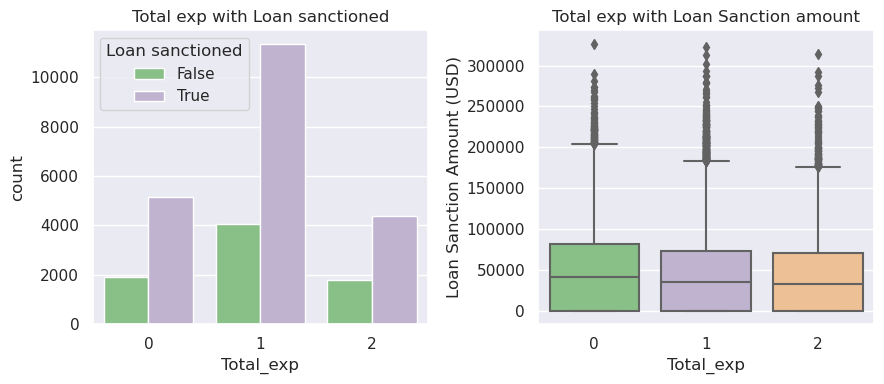

In [136]:
exp1 = df_main['Expense Type 1'].factorize()[0]
exp2 = df_main['Expense Type 2'].factorize()[0]

total_exp = pd.Series(exp1 + exp2)
df_main['Total_exp'] = total_exp

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.countplot(x= 'Total_exp', hue='Loan sanctioned', data=df_main, palette='Accent')
plt.title('Total exp with Loan sanctioned')

plt.subplot(1,2,2)
sns.boxplot(x='Total_exp', y='Loan Sanction Amount (USD)', data=df_main, palette='Accent')
plt.title('Total exp with Loan Sanction amount')

plt.tight_layout()

In [137]:
# Function for comparision and for plotting box plot
def show_comparision(df, x, hue='Loan sanctioned'):
    false_counts = df[df['Loan sanctioned']==False]
    true_counts = df[df['Loan sanctioned']==True].sample(false_counts.shape[0])
    sample_df = pd.concat([false_counts, true_counts])
    sns.countplot(x=x, hue=hue, data=sample_df)
    
def show_boxplot(df, x, y='Loan Sanction Amount (USD)'):
    df_greater_than_zero = df[df[y] > 0]
    sns.boxplot(x=x, y=y, data=df_greater_than_zero)

Credit Score Categories : 


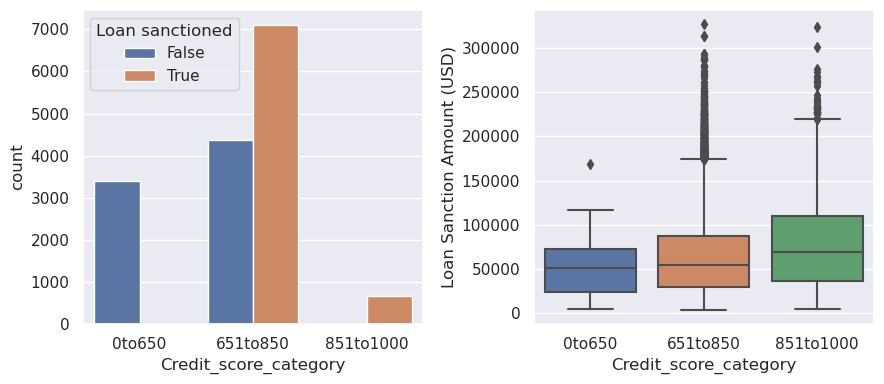

In [138]:
# Credit Score
labels = ['0to650', '651to850', '851to1000']
df_main['Credit_score_category'] = pd.cut(df_main['Credit Score'], labels=labels, bins=[0,650, 850, 1000])

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
show_comparision(df_main, 'Credit_score_category')

plt.subplot(1,2,2)
show_boxplot(df_main, x='Credit_score_category')

print('Credit Score Categories : ')
plt.tight_layout()

Current Loan Expenses : 


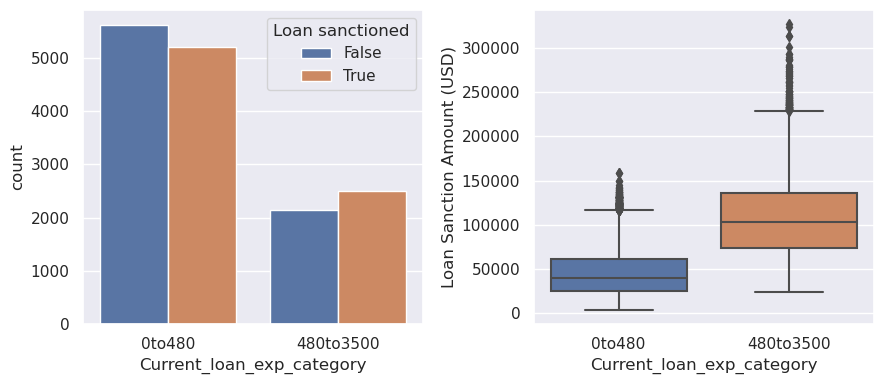

In [139]:
# Current Loan Expenses
labels= ['0to480', '480to3500']
df_main['Current_loan_exp_category'] = pd.cut(df_main['Current Loan Expenses (USD)'], bins=[0,480, 3500], labels=labels)

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
show_comparision(df_main, 'Current_loan_exp_category')

plt.subplot(1,2,2)
show_boxplot(df_main, x='Current_loan_exp_category')

print('Current Loan Expenses : ')
plt.tight_layout()

Age Category : 


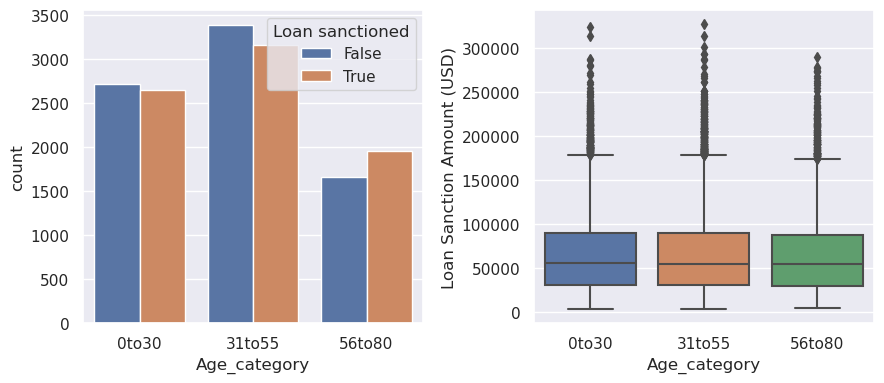

In [140]:
# Age
labels = ['0to30', '31to55', '56to80']
df_main['Age_category'] = pd.cut(df_main['Age'], bins=[0,30,55,80], labels=labels)

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
show_comparision(df_main, x='Age_category')

plt.subplot(1,2,2)
show_boxplot(df_main, x='Age_category')

print('Age Category : ')
plt.tight_layout()

Income Category : 


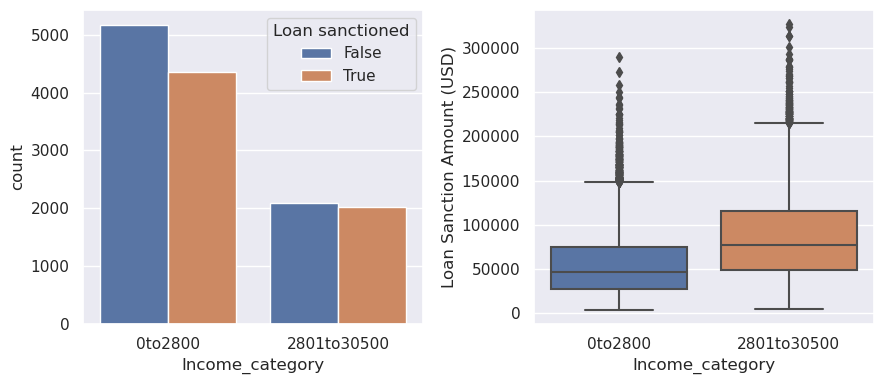

In [141]:
# Income 
labels= ['0to2800', '2801to30500']
df_main['Income_category'] = pd.cut(df_main['Income (USD)'], bins=[0,2800,30500], labels=labels)

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
show_comparision(df_main, 'Income_category')

plt.subplot(1,2,2)
show_boxplot(df_main, x='Income_category')

print('Income Category : ')
plt.tight_layout()

Property Price Category


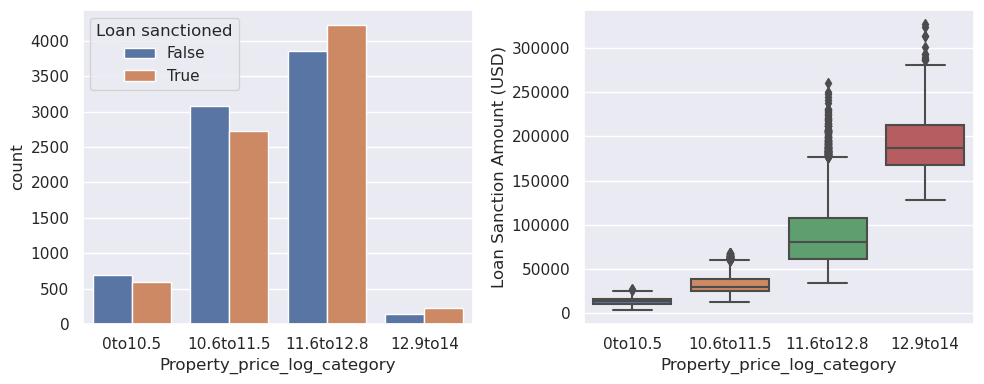

In [142]:
# Property Price
labels = ['0to10.5', '10.6to11.5', '11.6to12.8', '12.9to14']
df_main['Property_price_log_category'] = pd.cut(np.log(df_main['Property Price']), bins=[0,10.5, 11.5, 12.8, 14], labels=labels)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
show_comparision(df_main ,x='Property_price_log_category')

plt.subplot(1,2,2)
show_boxplot(df_main, x='Property_price_log_category')

print('Property Price Category')
plt.tight_layout()

Loan amount request category


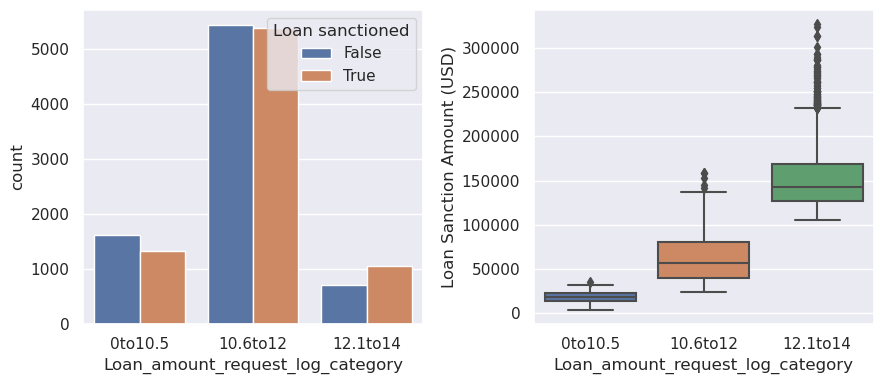

In [143]:
# Loan Amount Requested
labels = ['0to10.5', '10.6to12', '12.1to14']
df_main['Loan_amount_request_log_category'] = pd.cut(np.log(df_main['Loan Amount Request (USD)']), bins=[0,10.5, 12, 14], labels=labels)

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
show_comparision(df_main ,x='Loan_amount_request_log_category')

plt.subplot(1,2,2)
show_boxplot(df_main, x='Loan_amount_request_log_category')

print('Loan amount request category')
plt.tight_layout()

Dependents Indication


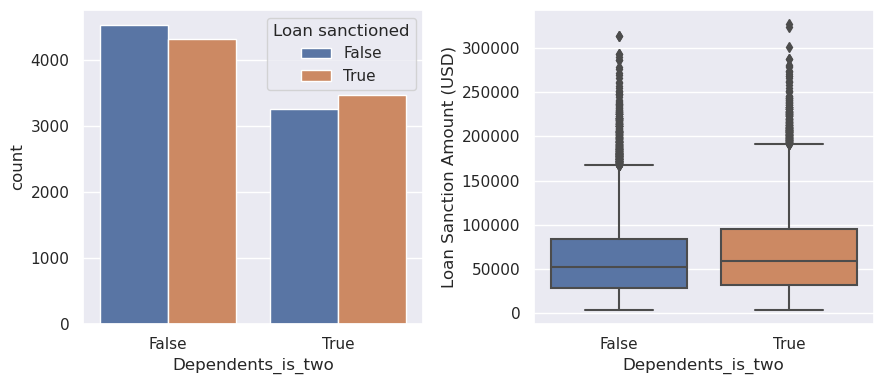

In [144]:
# Indicating whethter the dependents is 2 or not
df_main['Dependents_is_two'] = df_main['Dependents'].map(lambda x : x==2)

# Replacing -1 with 0
df_main['Dependents'] = df_main['Dependents'].replace({-1: 0})

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
show_comparision(df_main, 'Dependents_is_two')

plt.subplot(1,2,2)
show_boxplot(df_main, 'Dependents_is_two')

print('Dependents Indication')
plt.tight_layout()

In [145]:
cols = ['Current_loan_exp_category', 'Income_category', 'Property_price_log_category']
df_main = df_main.dropna(subset=cols)

In [146]:
# Updating train, validation and test set
train_set, validation_set, test_dataset = get_train_validation_test(df_main)

## Preprocessing

##### First of all, let's check whether all the features are in right data type or not

In [147]:
# Let's convert category to object type
category_cols = ['Credit_score_category', 'Current_loan_exp_category', 'Age_category',
                 'Income_category', 'Property_price_log_category','Loan_amount_request_log_category']
# Updating with new data type
df_main[category_cols] = df_main[category_cols].astype('object')

In [148]:
# Changing data types
df_main['Dependents'] =df_main['Dependents'].astype('int')
df_main['Co-Applicant'] = df_main['Co-Applicant'].astype('int')
df_main['Dependents_is_two'] =df_main['Dependents_is_two'].astype('int')

##### Features like Income stability, Location, Property location, Has active credit card, etc are ordinal data. So, let's change them.

In [149]:
print(f" For Income stability : [{df_main['Income Stability'].unique()}]")
print(f" For Location : [{df_main['Location'].unique()}]")
print(f" For Property Location : [{df_main['Property Location'].unique()}]")
print(f" For Has Active Credit Card : [{df_main['Has Active Credit Card'].unique()}]")


 For Income stability : [['Low' 'High']]
 For Location : [['Semi-Urban' 'Urban' 'Rural']]
 For Property Location : [['Urban' 'Rural' 'Semi-Urban']]
 For Has Active Credit Card : [['Active' 'Inactive' 'Unpossessed']]


In [150]:
# Encoding the features ordinally
df_main['Income Stability Ordered'] =df_main['Income Stability'].replace({'Low': 1, 'High': 2})
df_main['Location Ordered'] =df_main['Location'].replace({'Rural': 1, 'Semi-Urban': 2, 'Urban': 3})
df_main['Property Location Ordered'] =df_main['Property Location'].replace({'Rural': 1, 'Semi-Urban': 2, 'Urban': 3})
df_main['Has Active Credit Card Ordered'] =df_main['Has Active Credit Card'].replace({'Unpossessed': 1, 'Inactive': 2, 'Active': 3})

In [151]:
print(f" For Income stability Ordered: [{df_main['Income Stability Ordered'].unique()}]")
print(f" For Location Ordered: [{df_main['Location Ordered'].unique()}]")
print(f" For Property Location Ordered: [{df_main['Property Location Ordered'].unique()}]")
print(f" For Has Active Credit Card Ordered: [{df_main['Has Active Credit Card Ordered'].unique()}]")

 For Income stability Ordered: [[1 2]]
 For Location Ordered: [[2 3 1]]
 For Property Location Ordered: [[3 1 2]]
 For Has Active Credit Card Ordered: [[3 2 1]]


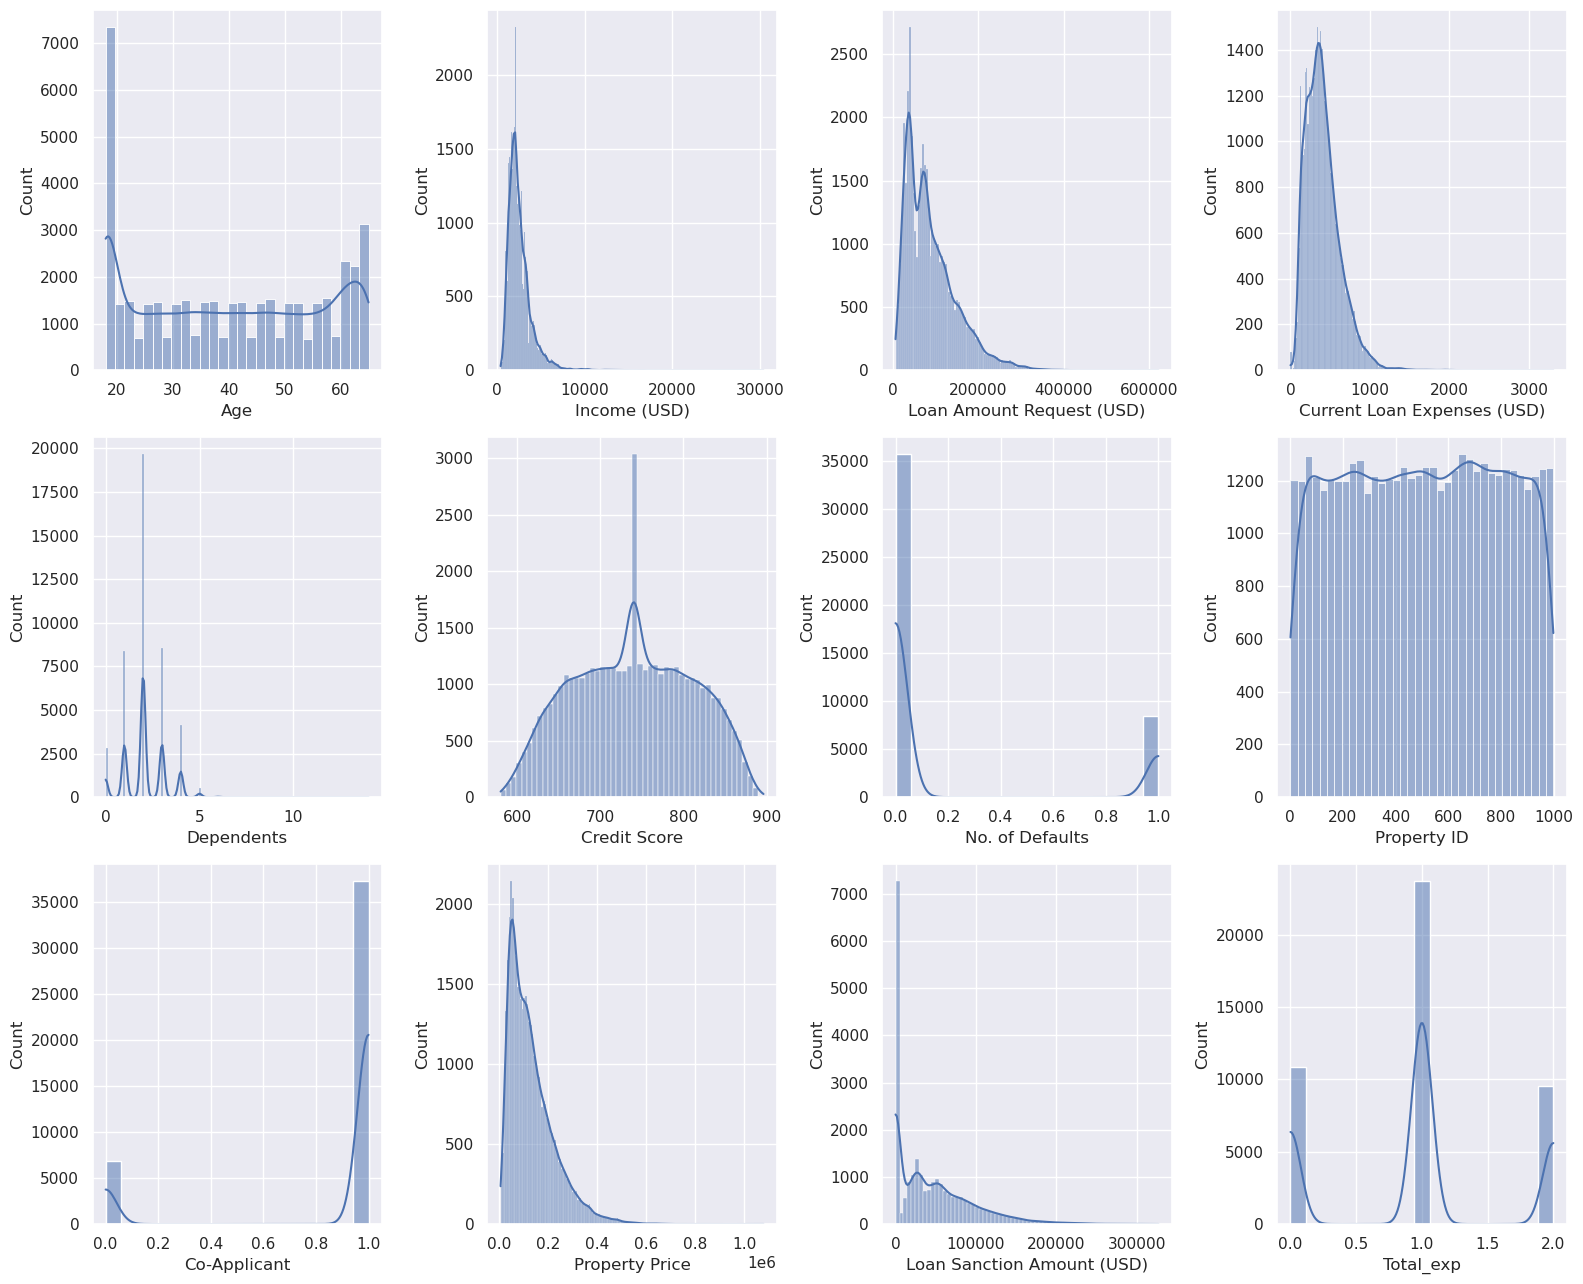

In [152]:
cols = train_set.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=(16,13))
for index, col in enumerate(cols):
    plt.subplot(3,4, index+1)
    sns.histplot(x=col, kde=True, data=df_main)
plt.tight_layout()

In [153]:
# Replacing -1 with 0
df_main['Income (USD)'] =df_main['Income (USD)'].replace({-1 : 0})
df_main['Current Loan Expenses (USD)'] =df_main['Current Loan Expenses (USD)'].replace({-1 : 0})

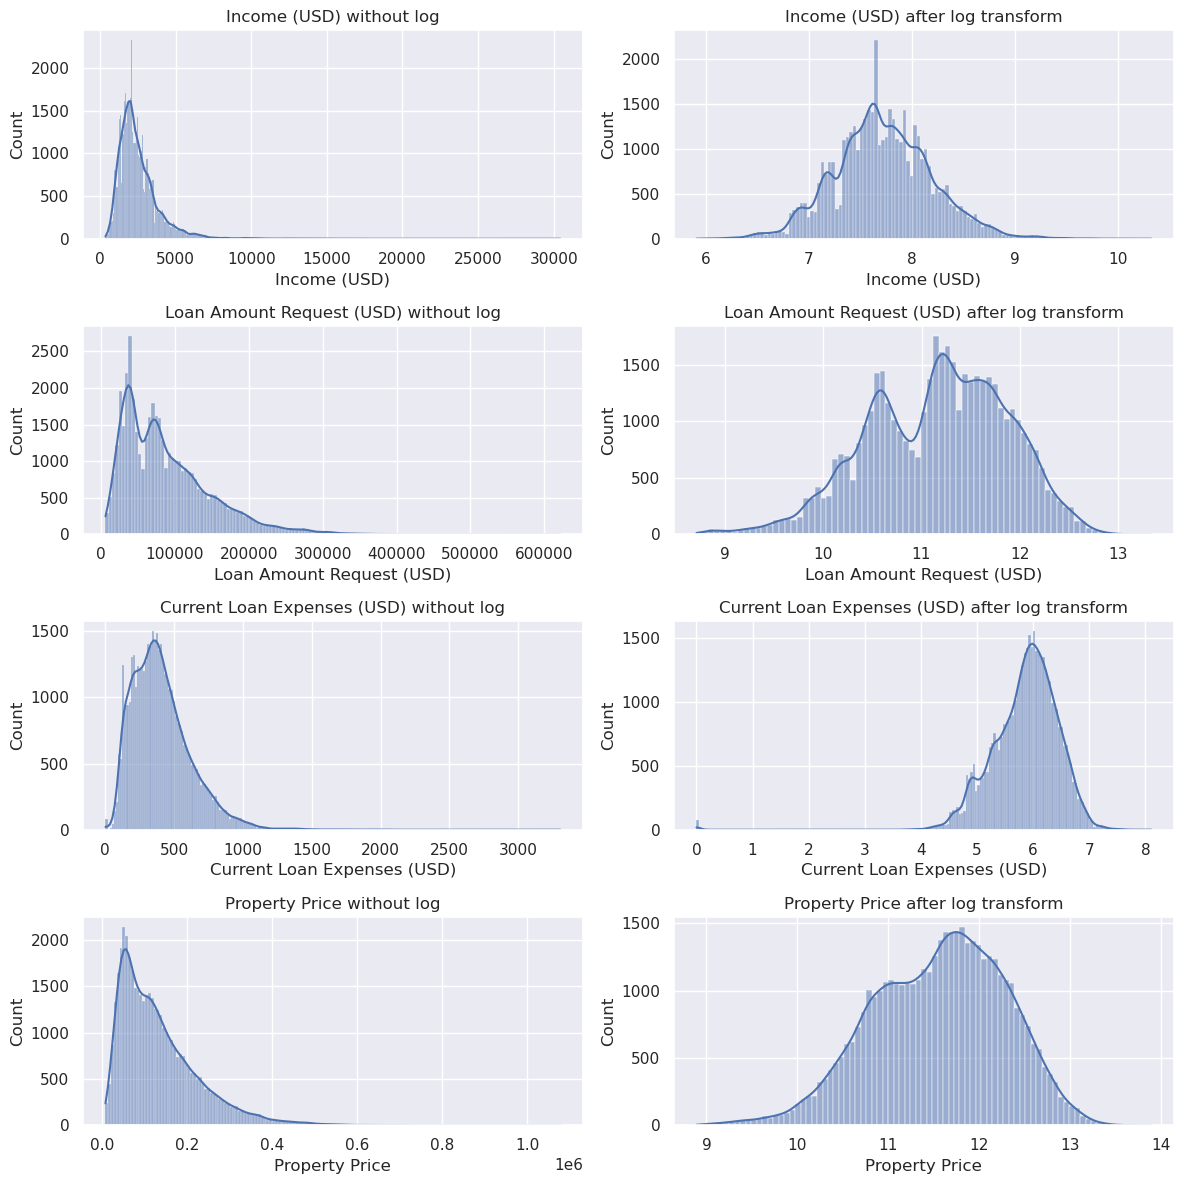

In [154]:
cols = ['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Property Price']

plt.figure(figsize=(12,12))

for index, col in enumerate(cols):
    plt.subplot(4,2, 2*index+1)
    sns.histplot(x=df_main[col], kde=True)
    plt.title(f'{col} without log')
    
    plt.subplot(4,2, 2*index+2)
    sns.histplot(x=np.log(df_main[col]), kde=True)
    plt.title(f'{col} after log transform')
    
plt.tight_layout()

In [155]:
# Log transformation
for i in ['Income (USD)', 'Loan Amount Request (USD)']:
    df_main[i] = np.log(df_main[i])

In [156]:
train_set, validation_set, test_dataset = get_train_validation_test(df_main)

In [157]:
cat_cols = df_main.select_dtypes(include=['object', 'category']).columns

for k in cat_cols:
    if k=='Customer ID' or k=='Loan sanctioned':
        continue
        
    print(f" For {k} : [{df_main[k].unique()}]")

 For Gender : [['F' 'M']]
 For Income Stability : [['Low' 'High']]
 For Profession : [['Working' 'State servant' 'Commercial associate' 'Pensioner' 'others']]
 For Type of Employment : [['Drivers' 'Core staff' 'Laborers' 'Medicine staff' 'Managers' 'Retired'
 'Not available' 'High skill tech staff' 'Accountants'
 'Private service staff' 'Sales staff' 'Cleaning staff'
 'Low-skill Laborers' 'Cooking staff' 'Secretaries' 'HR staff'
 'Waiters/barmen staff' 'Security staff' 'IT staff' 'Unknown'
 'Realty agents']]
 For Location : [['Semi-Urban' 'Urban' 'Rural']]
 For Expense Type 1 : [['Y' 'N']]
 For Expense Type 2 : [['Y' 'N']]
 For Has Active Credit Card : [['Active' 'Inactive' 'Unpossessed']]
 For Property Type : [['property 4' 'property 3' 'property 1' 'property 2']]
 For Property Location : [['Urban' 'Rural' 'Semi-Urban']]
 For Credit_score_category : [['651to850' '851to1000' '0to650']]
 For Current_loan_exp_category : [['480to3500' '0to480']]
 For Age_category : [['0to30' '31to55' '56t

In [158]:
con_cols = df_main.select_dtypes(include=['int', 'float']).columns

for c in con_cols:
    c_min = df_main[c].min()
    c_max =df_main[c].max()
    print(f"For {c} : [{c_min} to {c_max}]")

For Age : [18 to 65]
For Income (USD) : [5.909684915187837 to 10.323107999432471]
For Loan Amount Request (USD) : [8.707522599611721 to 13.339887682283951]
For Current Loan Expenses (USD) : [1.0 to 3305.97]
For Dependents : [0 to 14]
For Credit Score : [580.04 to 896.26]
For No. of Defaults : [0 to 1]
For Property ID : [1 to 999]
For Co-Applicant : [0 to 1]
For Property Price : [7265.95 to 1077966.73]
For Loan Sanction Amount (USD) : [0.0 to 326730.56]
For Total_exp : [0 to 2]
For Dependents_is_two : [0 to 1]
For Income Stability Ordered : [1 to 2]
For Location Ordered : [1 to 3]
For Property Location Ordered : [1 to 3]
For Has Active Credit Card Ordered : [1 to 3]


In [159]:
train_set, validation_set, test_dataset = get_train_validation_test(df_main)

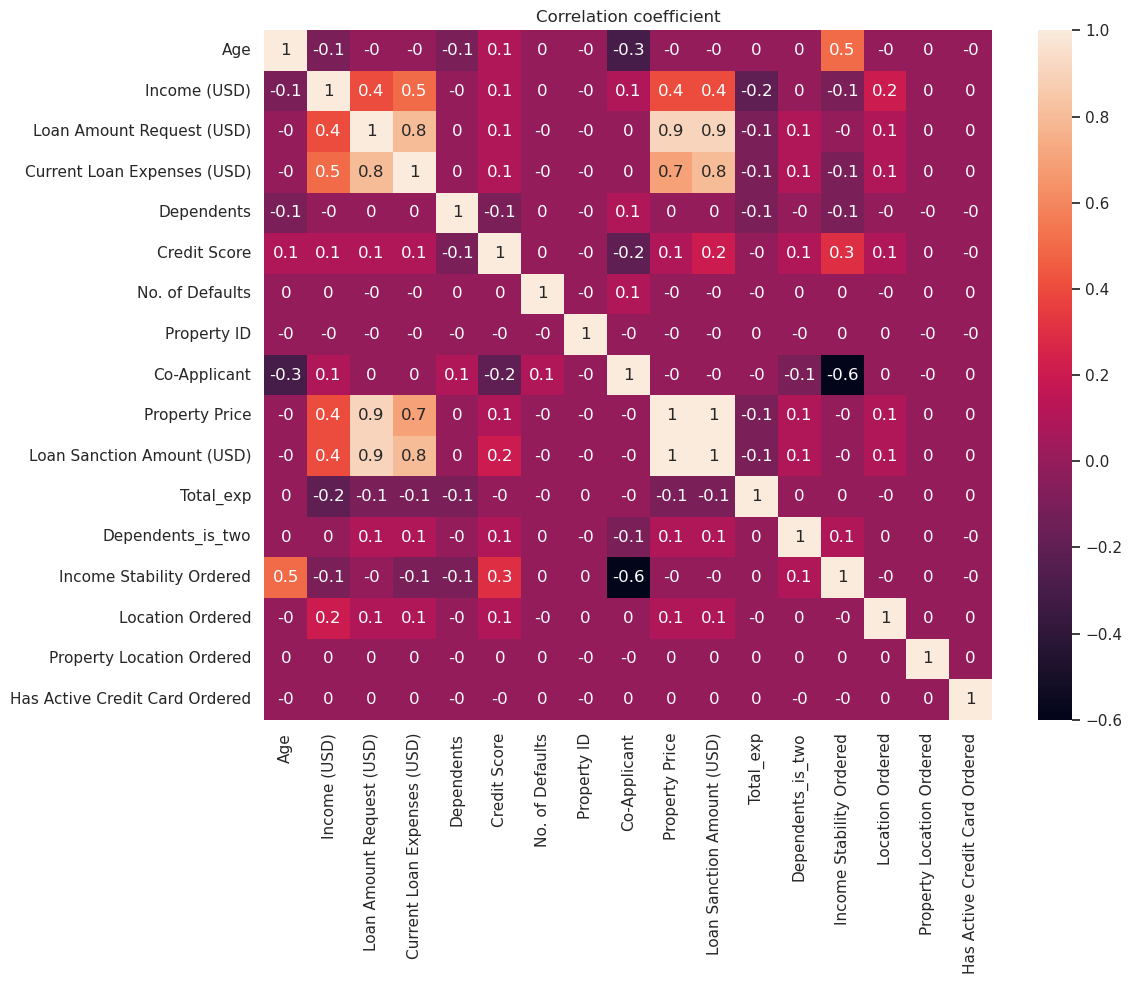

In [160]:
reg_exp = train_set[train_set['Loan Sanction Amount (USD)'] > 0]

corr = np.round(reg_exp.corr(), 1)

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.title('Correlation coefficient')
plt.tight_layout()

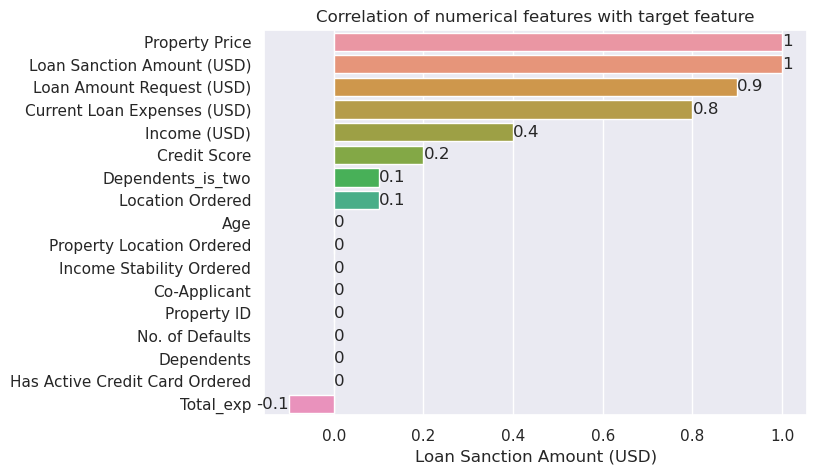

In [161]:
plt.figure(figsize=(7,5))
corr_target = corr['Loan Sanction Amount (USD)'].sort_values(ascending=False)

ax=sns.barplot(x=np.round(corr_target, 2), y=corr_target.index)
ax.bar_label(ax.containers[0])
plt.title('Correlation of numerical features with target feature')
plt.show()

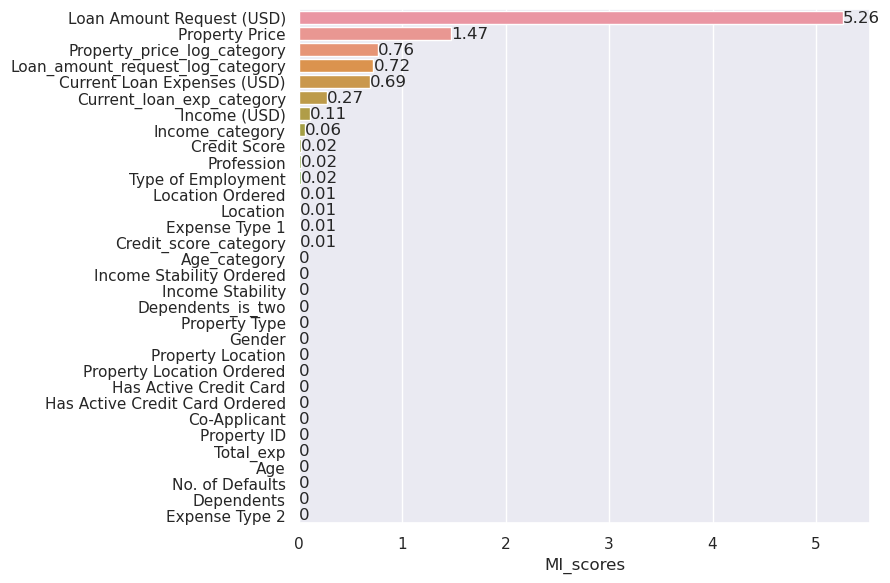

In [162]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# function for mutual information for Regression
def make_mi_score(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI_scores', index= X.columns)
    return mi_scores.sort_values(ascending=False)
    
    
reg_index = train_set[train_set['Loan Sanction Amount (USD)'] >0].index
    
X = train_set.loc[reg_index].drop(columns=['Customer ID', 'Loan Sanction Amount (USD)', 'Loan sanctioned'])
y = train_set.loc[reg_index]['Loan Sanction Amount (USD)']

for col in X.select_dtypes(include=['object', 'category']):
    X[col], _ = X[col].factorize()
    
discrete_feature = X.dtypes == int

mi_scores = make_mi_score(X, y, discrete_features = discrete_feature)

plt.figure(figsize=(9,6))
ax = sns.barplot(y= mi_scores.index, x=np.round(mi_scores, 2), orient='h' )
ax.bar_label(ax.containers[0])

plt.tight_layout()

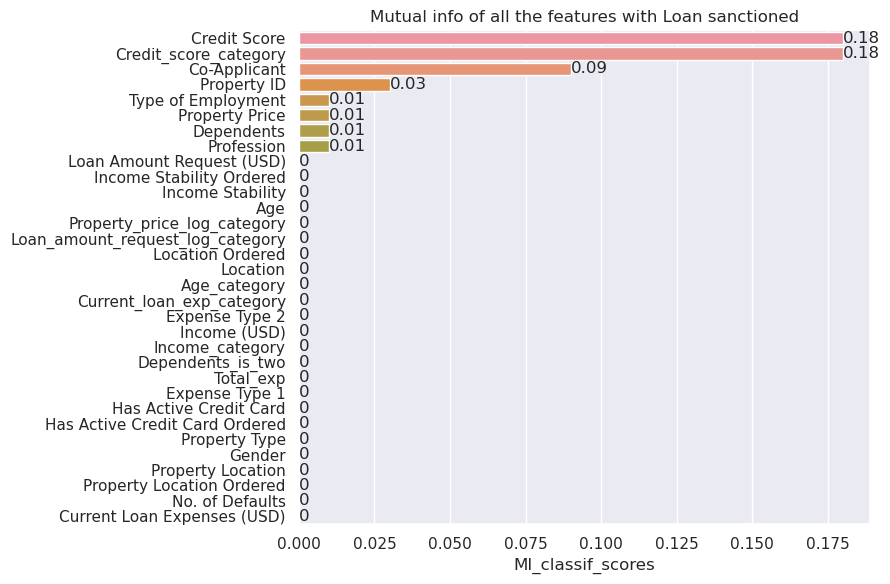

In [163]:
# Function for getting information gain for classification feature

def get_mi_scores(X, y, discrete_features):
    mi_classif_score = mutual_info_classif(X, y, discrete_features = discrete_features)   # Finding mutual info
    mi_classif_score = pd.Series(mi_classif_score, name='MI_classif_scores', index=X.columns)
    return mi_classif_score.sort_values(ascending=False)

X = train_set.drop(columns=['Customer ID', 'Loan Sanction Amount (USD)', 'Loan sanctioned'])
y = train_set['Loan sanctioned'].astype('int')

for k in X.select_dtypes(include=['object', 'category']):
    X[k], _ =X[k].factorize()   # Encoding categorical features
    
discrete_features = X.dtypes == int

mi_classif_scores = get_mi_scores(X, y, discrete_features = discrete_features)

plt.figure(figsize=(9,6))
ax = sns.barplot(x= np.round(mi_classif_scores, 2), y=mi_classif_scores.index, orient='h')
ax.bar_label(ax.containers[0])

plt.title('Mutual info of all the features with Loan sanctioned')
plt.tight_layout()

Chi-squared test for all the features


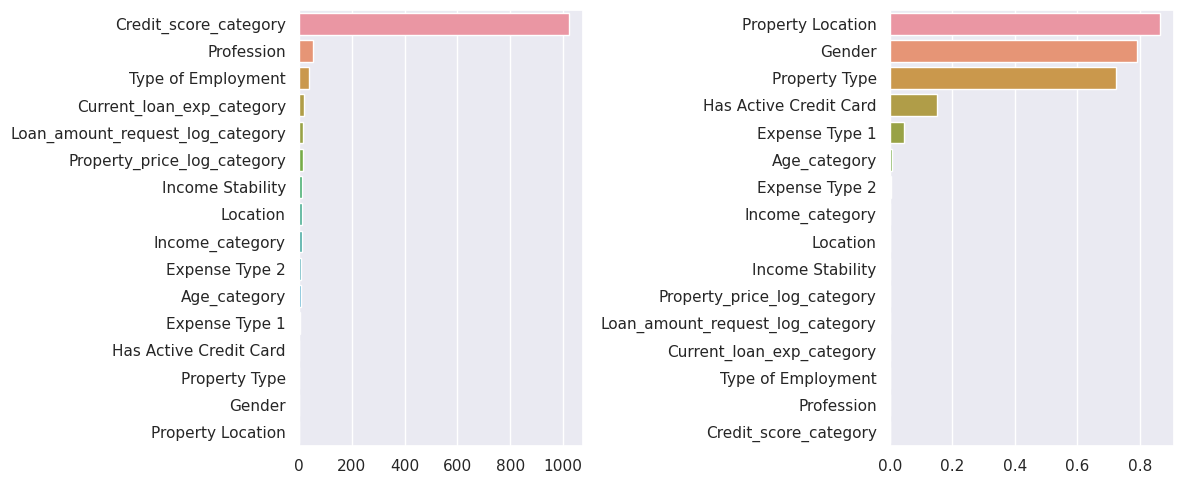

In [164]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2


X = train_set.drop(columns=['Customer ID', 'Loan Sanction Amount (USD)', 'Loan sanctioned']).select_dtypes(include=['object', 'category'])
y = train_set['Loan sanctioned'].astype('int')

for col in X.columns:
    le= LabelEncoder()
    X[col] = le.fit_transform(X.loc[:, [col]])
    
    
# Applying Chi_square_test
chi_scores = chi2(X, y)
chi_stats = pd.Series(chi_scores[0], index=X.columns)
chi_stats.sort_values(ascending=False, inplace=True)

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x = chi_stats, orient='h', y=chi_stats.index)

plt.subplot(1,2,2)
sns.barplot(x= p_values, y=p_values.index, orient='h')

print('Chi-squared test for all the features')
plt.tight_layout()

##### High chi_score means that feature is important. On the other hand, high p_values means that feature is not important for our model. As can be seen, we have many features with low mi score and high p_values. Such, features do not hold any role for affecting our target feature.

In [165]:
# Features to be removed
cols_to_remove = ['Property Location', 'Gender', 'Property Type', 'Has Active Credit Card', 'Expense Type 1', 'No. of Defaults']

## Model Creation

#### Classification Model

#### For train set

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_set['Loan sanctioned'].value_counts()

# Prediction when all values are 1
prediction_ones = pd.Series(np.ones(train_set.shape[0]))
print(f" Accuracy of model without balancing the dataset is {np.round(accuracy_score(train_set['Loan sanctioned'].astype('int'), prediction_ones)*100,2)} %")


 Accuracy of model without balancing the dataset is 70.19 %


In [167]:
cols_to_drop = ['Customer ID', 'No. of Defaults', 'Property Location', 'Property Location Ordered', 'Property Type', 'Has Active Credit Card',
                'Has Active Credit Card Ordered', 'Expense Type 1','Expense Type 2', 'Age_category', 'Gender', 'Loan Sanction Amount (USD)', 'Property ID' ]

train_set_clf = train_set.drop(columns=cols_to_drop)
train_set_clf.head(3)

Age  Income (USD) Income Stability Profession Type of Employment  \
0   30      7.363134              Low    Working            Drivers   
1   22      7.312440              Low    Working         Core staff   
2   18      7.741751              Low    Working           Laborers   

     Location  Loan Amount Request (USD)  Current Loan Expenses (USD)  \
0  Semi-Urban                  11.944760                       608.09   
1  Semi-Urban                   9.493069                       137.48   
2       Urban                  11.441631                       404.00   

   Dependents  Credit Score  Co-Applicant  Property Price Loan sanctioned  \
0           2        657.57             1       282095.31            True   
1           1        743.54             1        22477.46            True   
2           3        829.12             1       144847.06            True   

   Total_exp Credit_score_category Current_loan_exp_category Income_category  \
0          0              651to850                 480to3500         0to2800   
1          2              651to850                    0to480         0to2800   
2          1              651to850                    0to480         0to2800   

  Property_price_log_category Loan_amount_request_log_category  \
0                  11.6to12.8                         10.6to12   
1                     0to10.5                          0to10.5   
2                  11.6to12.8                         10.6to12   

   Dependents_is_two  Income Stability Ordered  Location Ordered  
0                  1                         1                 2  
1                  0                         1                 2  
2                  0                         1                 3

In [168]:
# Assigning all the classes with less than 1000 feaquency to 'others' class
counts = train_set_clf['Type of Employment'].value_counts()
threshold = 1000
repl = counts[counts < 1000].index
train_set_clf['Type of Employment'] = train_set_clf['Type of Employment'].replace(repl, 'others')

In [169]:
train_set_clf['Loan_amount_request_log_category'].value_counts()

10.6to12    13519
0to10.5      3607
12.1to14     2290
Name: Loan_amount_request_log_category, dtype: int64

In [170]:
# Performing Ordinal Encoding 
train_set_clf['Income Stability'] = train_set_clf['Income Stability'].map({'Low': 0, 'High':1})
train_set_clf['Location'] = train_set_clf['Location'].map({'Rural': 0, 'Semi-Urban': 1, 'Urban':2})
train_set_clf['Credit_score_category'] = train_set_clf['Credit_score_category'].map({'0to650':0, '651to850':1, '851to1000':2})
train_set_clf['Current_loan_exp_category'] = train_set_clf['Current_loan_exp_category'].map({'0to480': 0, '480to3500': 1})
train_set_clf['Income_category'] = train_set_clf['Income_category'].map({'0to2800':0 , '2801to30500': 1})
train_set_clf['Property_price_log_category'] = train_set_clf['Property_price_log_category'].map({'0to10.5':0, '10.6to11.5':1, '11.6to12.8': 2, '12.9to14': 3})
train_set_clf['Loan_amount_request_log_category'] = train_set_clf['Loan_amount_request_log_category'].map({'0to10.5':0, '10.6to12':1, '12.1to14':2})


In [171]:
train_set_clf['Loan sanctioned'].value_counts()

True     13629
False     5787
Name: Loan sanctioned, dtype: int64

In [172]:
false_sample = train_set_clf[train_set_clf['Loan sanctioned']==False]
true_sample = train_set_clf[train_set_clf['Loan sanctioned']==True].sample(false_sample.shape[0])

final_sample = pd.concat([false_sample, true_sample])
final_sample

Age  Income (USD)  Income Stability            Profession  \
4       29      7.329113                 0  Commercial associate   
8       65      7.074659                 1             Pensioner   
13      23      7.197720                 0  Commercial associate   
16      44      7.612658                 0         State servant   
17      31      8.083594                 0               Working   
...    ...           ...               ...                   ...   
10363   54      8.291226                 0  Commercial associate   
3304    24      8.263992                 0               Working   
2847    28      6.996736                 0  Commercial associate   
662     29      7.671808                 0               Working   
15868   38      6.918260                 0               Working   

      Type of Employment  Location  Loan Amount Request (USD)  \
4               Laborers         0                  11.157804   
8                Retired         0                  11.843294   
13              Managers         1                  10.427808   
16              Laborers         1                  10.801214   
17         Not available         1                  12.382283   
...                  ...       ...                        ...   
10363             others         1                  11.425464   
3304             Drivers         1                  10.194534   
2847          Core staff         0                  10.639552   
662          Sales staff         1                  11.101104   
15868             others         0                  11.323323   

       Current Loan Expenses (USD)  Dependents  Credit Score  Co-Applicant  \
4                           531.45           3        684.29             1   
8                           418.17           2        826.11             0   
13                          262.14           2        739.74             0   
16                          487.56           1        740.07             0   
17                          886.39           2        723.85             0   
...                            ...         ...           ...           ...   
10363                       293.83           2        705.67             1   
3304                        141.18           1        791.81             1   
2847                        180.02           0        677.46             1   
662                         349.56           2        774.98             1   
15868                       664.59           3        740.19             1   

       Property Price Loan sanctioned  Total_exp  Credit_score_category  \
4            83208.46           False          1                      1   
8           195206.35           False          1                      1   
13           59266.90           False          1                      1   
16           63949.17           False          2                      1   
17          433516.70           False          0                      1   
...               ...             ...        ...                    ...   
10363       167306.90            True          1                      1   
3304         45471.99            True          1                      1   
2847         76453.50            True          1                      1   
662         100097.52            True          1                      1   
15868       150134.98            True          2                      1   

       Current_loan_exp_category  Income_category  \
4                              1                0   
8                              0                0   
13                             0                0   
16                             1                0   
17                             1                1   
...                          ...              ...   
10363                          0                1   
3304                           0                1   
2847                           0                0   
662                            0         

In [173]:
train_features_clf = final_sample.drop(columns=['Loan sanctioned'])
target_clf = final_sample['Loan sanctioned']

In [174]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

trnf_1 = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), [3,4])
], remainder='passthrough')

In [175]:
train_clf_final = trnf_1.fit_transform(train_features_clf)
train_clf_final

array([[0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 1., 2., 1.],
       [0., 0., 0., ..., 1., 1., 2.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 1., 2.],
       [0., 0., 1., ..., 0., 1., 1.]])

In [176]:
# Encoding target feature
le = LabelEncoder()
target_clf_transformed = le.fit_transform(target_clf)

In [177]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(train_clf_final,target_clf_transformed)

LogisticRegression()

In [178]:
# Prediction on train set
target_pred = log_reg.predict(train_clf_final)

# Checking performance
accuracy_score(target_clf_transformed, target_pred)

0.5259201658890617

In [179]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier(max_depth=3)
dec_clf.fit(train_clf_final,target_clf_transformed)

DecisionTreeClassifier(max_depth=3)

In [180]:
target_pred = dec_clf.predict(train_clf_final)
print(f"Accuracy of the model is {np.round(accuracy_score(target_clf_transformed, target_pred)*100, 2)} %")
print(f"F1 score of the model is {np.round(f1_score(target_clf_transformed, target_pred)*100, 2)} %")

Accuracy of the model is 83.09 %
F1 score of the model is 85.46 %


#### For validation set

In [181]:
cols_to_drop = ['Customer ID', 'No. of Defaults', 'Property Location', 'Property Location Ordered', 'Property Type', 'Has Active Credit Card',
                'Has Active Credit Card Ordered', 'Expense Type 1','Expense Type 2', 'Age_category', 'Gender', 'Loan Sanction Amount (USD)', 'Property ID' ]

validation_set_clf = validation_set.drop(columns=cols_to_drop)
validation_set_clf.head(3)

Age  Income (USD) Income Stability            Profession  \
22921   18      7.565980              Low               Working   
22922   18      8.116742              Low               Working   
22923   20      8.306709              Low  Commercial associate   

          Type of Employment Location  Loan Amount Request (USD)  \
22921               Laborers    Rural                  11.318374   
22922  High skill tech staff    Rural                  11.918265   
22923         Medicine staff    Urban                  11.274167   

       Current Loan Expenses (USD)  Dependents  Credit Score  Co-Applicant  \
22921                       564.48           1        648.63             0   
22922                       528.16           2        815.42             0   
22923                       521.79           2        651.25             1   

       Property Price Loan sanctioned  Total_exp Credit_score_category  \
22921       153728.72           False          1                0to650   
22922       217608.78           False          1              651to850   
22923       122428.79            True          1              651to850   

      Current_loan_exp_category Income_category Property_price_log_category  \
22921                 480to3500         0to2800                  11.6to12.8   
22922                 480to3500     2801to30500                  11.6to12.8   
22923                 480to3500     2801to30500                  11.6to12.8   

      Loan_amount_request_log_category  Dependents_is_two  \
22921                         10.6to12                  0   
22922                         10.6to12                  1   
22923                         10.6to12                  1   

       Income Stability Ordered  Location Ordered  
22921                         1                 1  
22922                         1                 1  
22923                         1                 3

In [182]:
# Performing Ordinal Encoding 
validation_set_clf['Income Stability'] = validation_set_clf['Income Stability'].map({'Low': 0, 'High':1})
validation_set_clf['Location'] = validation_set_clf['Location'].map({'Rural': 0, 'Semi-Urban': 1, 'Urban':2})
validation_set_clf['Credit_score_category'] = validation_set_clf['Credit_score_category'].map({'0to650':0, '651to850':1, '851to1000':2})
validation_set_clf['Current_loan_exp_category'] = validation_set_clf['Current_loan_exp_category'].map({'0to480': 0, '480to3500': 1})
validation_set_clf['Income_category'] = validation_set_clf['Income_category'].map({'0to2800':0 , '2801to30500': 1})
validation_set_clf['Property_price_log_category'] = validation_set_clf['Property_price_log_category'].map({'0to10.5':0, '10.6to11.5':1, '11.6to12.8': 2, '12.9to14': 3})
validation_set_clf['Loan_amount_request_log_category'] = validation_set_clf['Loan_amount_request_log_category'].map({'0to10.5':0, '10.6to12':1, '12.1to14':2})

In [183]:
validation_features_clf = validation_set_clf.drop(columns=['Loan sanctioned'])
target_clf = validation_set_clf['Loan sanctioned']

# Column transformer
validation_clf_final = trnf_1.transform(validation_features_clf)
validation_clf_final

array([[0., 0., 1., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 3.],
       ...,
       [0., 0., 1., ..., 1., 1., 2.],
       [0., 0., 1., ..., 0., 1., 2.],
       [0., 0., 1., ..., 1., 1., 2.]])

In [184]:
target_clf_final = le.transform(target_clf)
target_clf_final

array([0, 0, 1, ..., 1, 1, 0])

In [185]:
target_pred = dec_clf.predict(validation_clf_final)
print(f"Accuracy of the model is {np.round(accuracy_score(target_clf_final, target_pred)*100, 2)} %")
print(f"F1 score of the model is {np.round(f1_score(target_clf_final, target_pred)*100, 2)} %")

Accuracy of the model is 89.57 %
F1 score of the model is 93.03 %


##### As can be seen, Decision tree performs better than logistic regression. The performance score is also satisfying. We can go with other ML models also. But, we stop here and choose Decision tree model.

#### Regression Model

In [186]:
# Loan amount greater then zero
train_set_reg = train_set[train_set['Loan Sanction Amount (USD)']>0]
train_set_reg.head()

Customer ID Gender  Age  Income (USD) Income Stability  \
0     C-13955      F   30      7.363134              Low   
1     C-23437      M   22      7.312440              Low   
2      C-4697      F   18      7.741751              Low   
3      C-7493      F   46      8.333571              Low   
5     C-21407      M   33      9.390343              Low   

             Profession Type of Employment    Location  \
0               Working            Drivers  Semi-Urban   
1               Working         Core staff  Semi-Urban   
2               Working           Laborers       Urban   
3         State servant     Medicine staff  Semi-Urban   
5  Commercial associate           Managers       Urban   

   Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
0                  11.944760                       608.09              Y   
1                   9.493069                       137.48              N   
2                  11.441631                       404.00              N   
3                  10.044378                       117.17              N   
5                  11.663899                       717.12              Y   

  Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0              Y           2        657.57                0   
1              N           1        743.54                0   
2              Y           3        829.12                0   
3              Y           2        707.01                0   
5              Y           2        740.07                0   

  Has Active Credit Card  Property ID Property Type Property Location  \
0                 Active          268    property 4             Urban   
1               Inactive          549    property 4             Rural   
2                 Active           35    property 3             Urban   
3                 Active          753    property 3             Rural   
5            Unpossessed          278    property 4             Rural   

   Co-Applicant  Property Price  Loan Sanction Amount (USD) Loan sanctioned  \
0             1       282095.31                   107805.61            True   
1             1        22477.46                     9287.22            True   
2             1       144847.06                    69839.05            True   
3             1        28062.99                    16118.17            True   
5             1       169966.57                    75592.75            True   

   Total_exp Credit_score_category Current_loan_exp_category Age_category  \
0          0              651to850                 480to3500        0to30   
1          2              651to850                    0to480        0to30   
2          1              651to850                    0to480        0to30   
3          1              651to850                    0to480       31to55   
5          0              651to850                 480to3500       31to55   

  Income_category Property_price_log_category  \
0         0to2800                  11.6to12.8   
1         0to2800                     0to10.5   
2         0to2800                  11.6to12.8   
3     2801to30500                     0to10.5   
5     2801to30500                  11.6to12.8   

  Loan_amount_request_log_category  Dependents_is_two  \
0                         10.6to12                  1   
1                          0to10.5                  0   
2                         10.6to12                  0   
3                          0to10.5                  1   
5                         10.6to12                  1   

   Income Stability Ordered  Location Ordered  Property Location Ordered  \
0                         1                 2                          3   
1                         1                 2                          1   
2                         1                 3                          3   
3                         1                 2                          1   
5                         1                 3                

In [187]:
train_set_reg.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD)', 'Income Stability',
       'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)', 'Loan sanctioned', 'Total_exp',
       'Credit_score_category', 'Current_loan_exp_category', 'Age_category',
       'Income_category', 'Property_price_log_category',
       'Loan_amount_request_log_category', 'Dependents_is_two',
       'Income Stability Ordered', 'Location Ordered',
       'Property Location Ordered', 'Has Active Credit Card Ordered'],
      dtype='object')

In [188]:
# Features that are not contributing to your model
cols_to_drop = ['Property Location', 'Gender', 'Property ID', 'Property Price', 'Has Active Credit Card', 'Expense Type 1', 'Expense Type 2',
               'Current Loan Expenses (USD)', 'No. of Defaults', 'Location', 'Customer ID', 'Property Type','Loan sanctioned' ]
# Dropping features in order to reduce dimensions
train_set_reg_new = train_set_reg.drop(columns=cols_to_drop)

validation_set_reg_new = validation_set.drop(columns=cols_to_drop)

In [189]:
train_set_reg_new.head(3)

Age  Income (USD) Income Stability Profession Type of Employment  \
0   30      7.363134              Low    Working            Drivers   
1   22      7.312440              Low    Working         Core staff   
2   18      7.741751              Low    Working           Laborers   

   Loan Amount Request (USD)  Dependents  Credit Score  Co-Applicant  \
0                  11.944760           2        657.57             1   
1                   9.493069           1        743.54             1   
2                  11.441631           3        829.12             1   

   Loan Sanction Amount (USD)  Total_exp Credit_score_category  \
0                   107805.61          0              651to850   
1                     9287.22          2              651to850   
2                    69839.05          1              651to850   

  Current_loan_exp_category Age_category Income_category  \
0                 480to3500        0to30         0to2800   
1                    0to480        0to30         0to2800   
2                    0to480        0to30         0to2800   

  Property_price_log_category Loan_amount_request_log_category  \
0                  11.6to12.8                         10.6to12   
1                     0to10.5                          0to10.5   
2                  11.6to12.8                         10.6to12   

   Dependents_is_two  Income Stability Ordered  Location Ordered  \
0                  1                         1                 2   
1                  0                         1                 2   
2                  0                         1                 3   

   Property Location Ordered  Has Active Credit Card Ordered  
0                          3                               3  
1                          1                               2  
2                          3                               3

In [190]:
train_set_reg['Age_category'].value_counts()

31to55    5516
0to30     4659
56to80    3454
Name: Age_category, dtype: int64

In [191]:
# Performing Ordinal Encoding 
# For train set
train_set_reg_new['Income Stability'] = train_set_reg_new['Income Stability'].map({'Low': 0, 'High':1})
train_set_reg_new['Credit_score_category'] = train_set_reg_new['Credit_score_category'].map({'0to650':0, '651to850':1, '851to1000':2})
train_set_reg_new['Current_loan_exp_category'] = train_set_reg_new['Current_loan_exp_category'].map({'0to480': 0, '480to3500': 1})
train_set_reg_new['Income_category'] = train_set_reg_new['Income_category'].map({'0to2800':0 , '2801to30500': 1})
train_set_reg_new['Property_price_log_category'] = train_set_reg_new['Property_price_log_category'].map({'0to10.5':0, '10.6to11.5':1, '11.6to12.8': 2, '12.9to14': 3})
train_set_reg_new['Loan_amount_request_log_category'] = train_set_reg_new['Loan_amount_request_log_category'].map({'0to10.5':0, '10.6to12':1, '12.1to14':2})
train_set_reg_new['Age_category'] = train_set_reg_new['Age_category'].map({'0to30': 0, '31to55':1, '56to80':2})


# For validation set
validation_set_reg_new['Income Stability'] = validation_set_reg_new['Income Stability'].map({'Low': 0, 'High':1})
validation_set_reg_new['Credit_score_category'] = validation_set_reg_new['Credit_score_category'].map({'0to650':0, '651to850':1, '851to1000':2})
validation_set_reg_new['Current_loan_exp_category'] = validation_set_reg_new['Current_loan_exp_category'].map({'0to480': 0, '480to3500': 1})
validation_set_reg_new['Income_category'] = validation_set_reg_new['Income_category'].map({'0to2800':0 , '2801to30500': 1})
validation_set_reg_new['Property_price_log_category'] = validation_set_reg_new['Property_price_log_category'].map({'0to10.5':0, '10.6to11.5':1, '11.6to12.8': 2, '12.9to14': 3})
validation_set_reg_new['Loan_amount_request_log_category'] = validation_set_reg_new['Loan_amount_request_log_category'].map({'0to10.5':0, '10.6to12':1, '12.1to14':2})
validation_set_reg_new['Age_category'] = validation_set_reg_new['Age_category'].map({'0to30': 0, '31to55':1, '56to80':2})

In [192]:
validation_set_reg_new.head(3)

Age  Income (USD)  Income Stability            Profession  \
22921   18      7.565980                 0               Working   
22922   18      8.116742                 0               Working   
22923   20      8.306709                 0  Commercial associate   

          Type of Employment  Loan Amount Request (USD)  Dependents  \
22921               Laborers                  11.318374           1   
22922  High skill tech staff                  11.918265           2   
22923         Medicine staff                  11.274167           2   

       Credit Score  Co-Applicant  Loan Sanction Amount (USD)  Total_exp  \
22921        648.63             0                        0.00          1   
22922        815.42             0                        0.00          1   
22923        651.25             1                    55132.34          1   

       Credit_score_category  Current_loan_exp_category  Age_category  \
22921                      0                          1             0   
22922                      1                          1             0   
22923                      1                          1             0   

       Income_category  Property_price_log_category  \
22921                0                            2   
22922                1                            2   
22923                1                            2   

       Loan_amount_request_log_category  Dependents_is_two  \
22921                                 1                  0   
22922                                 1                  1   
22923                                 1                  1   

       Income Stability Ordered  Location Ordered  Property Location Ordered  \
22921                         1                 1                          1   
22922                         1                 1                          3   
22923                         1                 3                          1   

       Has Active Credit Card Ordered  
22921                               2  
22922                               2  
22923                               3

In [193]:
# Separating inputs and target features
train_set_target = train_set_reg_new['Loan Sanction Amount (USD)']
train_set_reg_features = train_set_reg_new.drop(columns=['Loan Sanction Amount (USD)'])

In [194]:
validation_target = validation_set_reg_new['Loan Sanction Amount (USD)']

In [195]:
# Performing nominal encoding using one-hot encoder

# For train set
train_set_reg_final = trnf_1.fit_transform(train_set_reg_features)
train_set_reg_final

# For validation set
validation_set_reg_final = trnf_1.fit_transform(validation_set_reg_new)
validation_set_reg_final

array([[0., 0., 1., ..., 1., 1., 2.],
       [0., 0., 1., ..., 1., 3., 2.],
       [0., 0., 0., ..., 3., 1., 3.],
       ...,
       [0., 0., 1., ..., 2., 1., 2.],
       [0., 0., 1., ..., 2., 1., 1.],
       [0., 0., 1., ..., 2., 3., 3.]])

In [196]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_set_reg_final, train_set_target)

LinearRegression()

In [197]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Prediction on train set
train_set_reg_pred = lr.predict(train_set_reg_final)
# Checking for accuracy of the model
print(f"R2_score of the model is {np.round(r2_score(train_set_target, train_set_reg_pred),2)}")
print(f"Mean Absolute Eroor of the model is {np.round(mean_absolute_error(train_set_target, train_set_reg_pred), 2)}")

R2_score of the model is 0.85
Mean Absolute Eroor of the model is 11957.78


In [198]:
from sklearn.tree import DecisionTreeRegressor
# Applying decision tree regressor
tr_reg = DecisionTreeRegressor(max_depth=3)

tr_reg.fit(train_set_reg_final, train_set_target)

DecisionTreeRegressor(max_depth=3)

In [199]:
train_set_reg_pred = tr_reg.predict(train_set_reg_final)
# Checking for accuracy of the model
print(f"R2_score of the model is {np.round(r2_score(train_set_target, train_set_reg_pred),2)}")
print(f"Mean Absolute Eroor of the model is {np.round(mean_absolute_error(train_set_target, train_set_reg_pred), 2)}")

R2_score of the model is 0.95
Mean Absolute Eroor of the model is 6697.02
